In [2]:
# use stats_env for statannot in plots
# need to remove the stop codons from the averages and statistics
# check unique sites to eif2a and k3l contacts
# note that af2 k3l contacts are NOT good predictors in my data

In [1]:
import pandas as pd
import numpy as np
#from Bio.Seq import Seq
#from statannot import add_stat_annotation

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)
import seaborn as sns

from scipy.stats import f_oneway,tukey_hsd,ttest_ind

In [2]:
df = pd.read_csv('../data/221026_recheck-miseq-triplicates/barseq_counts.csv')

# normalize read count
sample_list = ['1','2','3','4','5','6']
for sample in sample_list:
    df[f'{sample}_norm'] = df[sample]/df[sample].sum()

# fold change
for t0,t1 in zip([1,2,3],[4,5,6]):
    df[f'fold_change_{t0}'] = df[f'{t1}_norm'] / df[f'{t0}_norm']
    
df['pkr'] = df['var'].str.split('_').str[0]
df['k3l'] = df['var'].str.split('_').str[1]

# down-select for K3L-NULL and K3L-WT
def k3l_type(row, k3l_stop=88):
    x = row['k3l'].split('-')[1]
    if x == 'WT':
        return 'K3L-WT'
    elif x[-1] == '*' and int(x[1:-1]) < k3l_stop:
        return 'K3L-STOP' 
    else:
        return 'K3L-VAR'
    
df['k3l_type'] = df.apply(lambda x: k3l_type(x), axis=1)

# select for only pairs to K3L-WT
df1 = df.query('k3l == "K3L-WT"')

pkr_resistant_vars = ['E375V','I378T', 'R382I', 'I405M', 'S448G', 'M455V', 'A473T', 'E480D', 'D486V', 'T491S', 'S504L', 'E524V']
def pkr_type(x, pkr_stop = 550):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "STOP"
    elif x[-2:] == 'WT':
        return "WT"
    elif x.split('-')[1] in pkr_resistant_vars:
        return "Resistant"
    else:
        return 'Variant'
df1['pkr_type'] = df1['pkr'].apply(pkr_type)

df1['mean_fold_change'] = df1[['fold_change_1','fold_change_2','fold_change_3']].mean(axis=1)

# take only measures with >10 reads at TP-0
df1['tp0_read_mean'] = df1[['1','2','3']].mean(axis=1)

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_45679/391617153.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pkr_type'] = df1['pkr'].apply(pkr_type)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_45679/391617153.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_fold_change'] = df1[['fold_change_1','fold_change_2','fold_change_3']].mean(axis=1)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_45679/391617153.py:45: SettingWithCopyWarning: 
A value is

In [8]:
df1

,var,1,2,3,4,5,6,pkr,k3l,1_norm,...,4_norm,5_norm,6_norm,fold_change_1,fold_change_2,fold_change_3,k3l_type,pkr_type,mean_fold_change,tp0_read_mean
0,PKR-WT_K3L-WT,3242.0,1863.0,2433.0,2283.0,2877.0,2144.0,PKR-WT,K3L-WT,0.011913,...,0.011238,0.011350,0.011772,0.943334,1.002075,0.930655,K3L-WT,WT,0.958688,2512.666667
1,PKR-F278L_K3L-WT,593.0,305.0,411.0,496.0,737.0,495.0,PKR-F278L,K3L-WT,0.002179,...,0.002442,0.002907,0.002718,1.120468,1.567981,1.271948,K3L-WT,Variant,1.320132,436.333333
2,PKR-M455I_K3L-WT,406.0,210.0,239.0,271.0,324.0,243.0,PKR-M455I,K3L-WT,0.001492,...,0.001334,0.001278,0.001334,0.894161,1.001150,1.073778,K3L-WT,Variant,0.989696,285.000000
3,PKR-Y454*_K3L-WT,403.0,192.0,261.0,369.0,475.0,322.0,PKR-Y454*,K3L-WT,0.001481,...,0.001816,0.001874,0.001768,1.226574,1.605335,1.302931,K3L-WT,STOP,1.378280,285.333333
4,PKR-E384D_K3L-WT,373.0,226.0,279.0,291.0,372.0,227.0,PKR-E384D,K3L-WT,0.001371,...,0.001432,0.001468,0.001246,1.045097,1.068090,0.859266,K3L-WT,Variant,0.990818,292.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61264,PKR-R447M_K3L-WT,1.0,NaN,1.0,1.0,1.0,1.0,PKR-R447M,K3L-WT,0.000004,...,0.000005,0.000004,0.000005,1.339592,NaN,1.056102,K3L-WT,Variant,1.197847,1.000000
64518,PKR-H286R_K3L-WT,1.0,NaN,3.0,2.0,3.0,5.0,PKR-H286R,K3L-WT,0.000004,...,0.000010,0.000012,0.000027,2.679183,NaN,1.760170,K3L-WT,Variant,2.219677,2.000000
74193,PKR-R58G_K3L-WT,1.0,6.0,2.0,2.0,2.0,3.0,PKR-R58G,K3L-WT,0.000004,...,0.000010,0.000008,0.000016,2.679183,0.216298,1.584153,K3L-WT,Variant,1.493211,3.000000
83332,PKR-D370Y_K3L-WT,NaN,3.0,NaN,NaN,3.0,1.0,PKR-D370Y,K3L-WT,NaN,...,NaN,0.000012,0.000005,NaN,0.648893,NaN,K3L-WT,Variant,0.648893,3.000000


In [14]:
df1.pkr_type.unique().tolist()

['WT', 'Variant', 'STOP', 'Resistant']

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_45679/387057304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pkr_type_color'] = df1.pkr_type.map(color_dict)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_45679/387057304.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0, top=5)


(0.23794336345275519, 5)

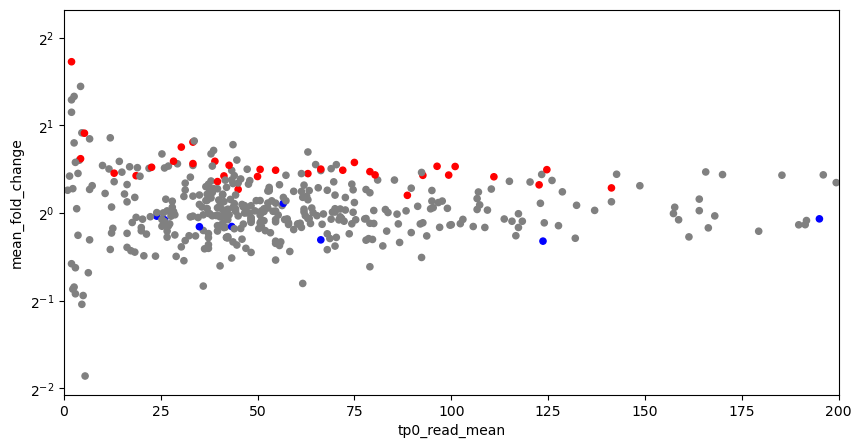

In [22]:
color_dict = {'WT':"green",'STOP':'red',"Resistant":"blue","Variant":'gray'} # {'WT':"#1DA5E4",'STOP':'#F92321',"Resistant":"#242AD9","Variant":'gray'}
df1['pkr_type_color'] = df1.pkr_type.map(color_dict)

ax = df1.plot.scatter(x='tp0_read_mean', y='mean_fold_change', c='pkr_type_color')
ax.set_xlim(0,200)
ax.set_yscale("log", base=2)
ax.set_ylim(bottom=0, top=5)

In [5]:
df1.query('tp0_read_mean > 9').pkr.nunique()

406

In [23]:
df1.query('tp0_read_mean > 17').pkr.nunique()

388

In [24]:
df1.pkr.nunique()

438

In [26]:
387/437

0.88558352402746

In [2]:
df2 = df1.query('tp0_read_mean >= 10').melt(['pkr', 'pkr_type'], 'mean_fold_change')

# display means for PKR variants
print(df2.groupby('pkr_type')['value'].mean())

variant_map = {'WT':'WT','STOP':'Nonsense', 'Resistant':'Known Improved Variant', 'Variant':'Missense Variant'}
df2['pkr_type'] = df2.pkr_type.map(variant_map)

pkr_type
Resistant    0.920829
STOP         1.395838
Variant      1.041986
WT           0.958688
Name: value, dtype: float64


/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84863/3770158467.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pkr_type'] = df1['pkr'].apply(pkr_type)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84863/3770158467.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_fold_change'] = df1[['fold_change_1','fold_change_2','fold_change_3']].mean(axis=1)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84863/3770158467.py:45: SettingWithCopyWarning: 
A value

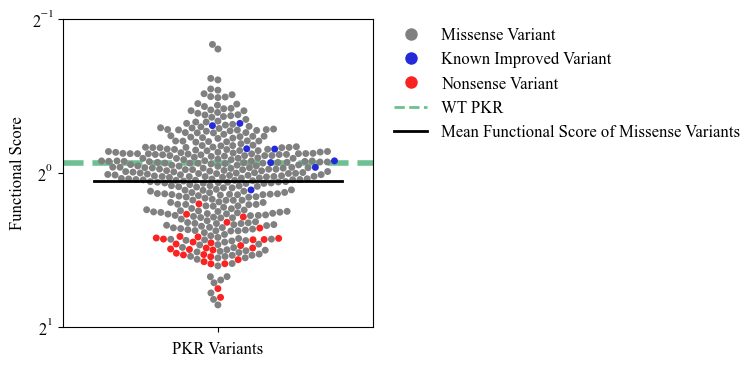

In [3]:
# plot
output_file = '../img/pkr-data/2.3_pkr-variants-swarmplot.pdf'

# plot values to use throughout
y_axis_label = "PKR Functional Score"

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (4,4)

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

# swarmplot
color_dict = {'WT':"#1DA5E4",'Nonsense':'#F92321',"Known Improved Variant":"#242AD9","Missense Variant":'gray'}

g = sns.swarmplot(
    #x='value',
    y='value', 
    hue='pkr_type', 
    data=df2.query('pkr_type != "WT"'),
    palette = color_dict,
    #order=['Resistant','STOP','Variant'],
    #hue_order=['Resistant','STOP','Variant']
)
g.invert_yaxis()

g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365

#g.get_legend().remove()
#g.spines["left"].set_visible(True)
#g.yaxis.set_minor_locator(AutoMinorLocator())
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    #x="pkr_regions",
    y="value",
    data=df2.query('pkr_type != "WT" and pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    #order=['Region 1','Region 2','Region 3', 'Region 4'],
    ax=g
)

#g.get_xaxis().set_visible(False)
#g.get_yaxis().set_visible(False)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('PKR Variants')


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score of Missense Variants', linestyle='-'),

]
g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" 
g.get_legend().set_visible(True)

fig = g.get_figure()
#for extension in ['.png','.svg']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight', dpi=300)


/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84863/3844693014.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Functional Score'] = -np.log2(data['value'])


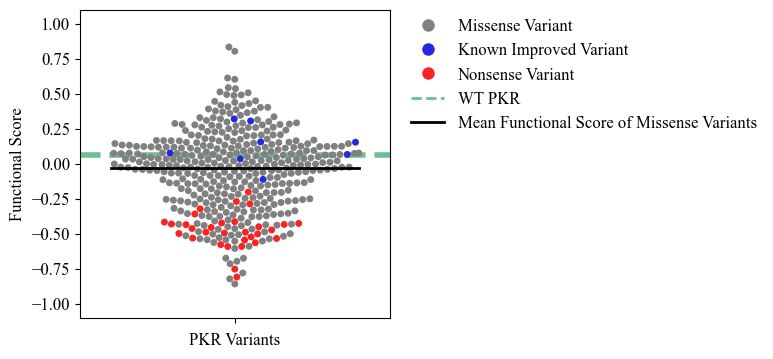

In [4]:
# plot
output_file = '../img/pkr-data/pkr-variants-swarmplot_FS.pdf'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (4,4)

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

# data
data = df2.query('pkr_type != "WT"')
data['Functional Score'] = -np.log2(data['value'])

# swarmplot
color_dict = {'WT':"#1DA5E4",'Nonsense':'#F92321',"Known Improved Variant":"#242AD9","Missense Variant":'gray'}

g = sns.swarmplot(
    #x='value',
    y='Functional Score', 
    hue='pkr_type', 
    data=data,
    palette = color_dict,
    #order=['Resistant','STOP','Variant'],
    #hue_order=['Resistant','STOP','Variant']
)

g.axhline(0.060867, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365

#g.get_legend().remove()
#g.spines["left"].set_visible(True)
#g.yaxis.set_minor_locator(AutoMinorLocator())
g.set_ylim(bottom=-1.1, top=1.1)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    #x="pkr_regions",
    y="Functional Score",
    data=data.query('pkr_type != "WT" and pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    #order=['Region 1','Region 2','Region 3', 'Region 4'],
    ax=g
)

#g.get_xaxis().set_visible(False)
#g.get_yaxis().set_visible(False)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('PKR Variants')


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score of Missense Variants', linestyle='-'),

]
g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" 
g.get_legend().set_visible(True)

fig = g.get_figure()
#for extension in ['.png','.svg']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight', dpi=300)


In [10]:
df2

,pkr,pkr_type,variable,value,Functional Score
0,PKR-WT,WT,mean_fold_change,0.958688,0.060867
1,PKR-F278L,Missense Variant,mean_fold_change,1.320132,-0.400683
2,PKR-M455I,Missense Variant,mean_fold_change,0.989696,0.014943
3,PKR-Y454*,Nonsense,mean_fold_change,1.378280,-0.462869
4,PKR-E384D,Missense Variant,mean_fold_change,0.990818,0.013309
...,...,...,...,...,...
401,PKR-S448A,Missense Variant,mean_fold_change,1.382137,-0.466901
402,PKR-I420T,Missense Variant,mean_fold_change,1.048707,-0.068612
403,PKR-F267I,Missense Variant,mean_fold_change,1.456898,-0.542900
404,PKR-I503L,Missense Variant,mean_fold_change,1.813361,-0.858666


In [11]:
df2.query('pkr_type != "WT" and pkr_type != "Nonsense"')['Functional Score'].mean()

-0.029233618978654927

In [6]:
df2['Functional Score'] = -np.log2(df2['value'])

In [28]:
df2[df2["Functional Score"] >= 0.060867].query('pkr_type == "Known Improved Variant"')

,pkr,pkr_type,variable,value,Functional Score
12,PKR-M455V,Known Improved Variant,mean_fold_change,0.955269,0.066021
52,PKR-E480D,Known Improved Variant,mean_fold_change,0.800921,0.320268
164,PKR-E375V,Known Improved Variant,mean_fold_change,0.809058,0.305686
280,PKR-I378T,Known Improved Variant,mean_fold_change,0.899042,0.153539
322,PKR-T491S,Known Improved Variant,mean_fold_change,0.947997,0.077046
358,PKR-S448G,Known Improved Variant,mean_fold_change,0.897697,0.155700


In [9]:
df2[df2["Functional Score"] <= 0.060867]

,pkr,pkr_type,variable,value,Functional Score
1,PKR-F278L,Missense Variant,mean_fold_change,1.320132,-0.400683
2,PKR-M455I,Missense Variant,mean_fold_change,0.989696,0.014943
3,PKR-Y454*,Nonsense,mean_fold_change,1.378280,-0.462869
4,PKR-E384D,Missense Variant,mean_fold_change,0.990818,0.013309
5,PKR-M455L,Missense Variant,mean_fold_change,1.263435,-0.337351
...,...,...,...,...,...
401,PKR-S448A,Missense Variant,mean_fold_change,1.382137,-0.466901
402,PKR-I420T,Missense Variant,mean_fold_change,1.048707,-0.068612
403,PKR-F267I,Missense Variant,mean_fold_change,1.456898,-0.542900
404,PKR-I503L,Missense Variant,mean_fold_change,1.813361,-0.858666


In [24]:
# make df4

# remove WT
df3 = df1[1:]

df3['pkr_site'] = df3.pkr.str.split('-').str[1].str[1:-1].astype(int)

win_sites = [(255,278),(371,385),(448,455),(480,506)]
site_map = {}
for i,n in enumerate(win_sites):
    region_n = i+1
    start = n[0]
    end = n[1]
    while start != end + 1:
        site_map[start] = f'Window {region_n}'
        start = start + 1

df3['pkr_regions'] = df3.pkr_site.map(site_map)   

df4 = df3.query('tp0_read_mean >= 10').melt(['pkr', 'pkr_type','pkr_regions'], 'mean_fold_change')

df4['pkr_site'] = df4['pkr'].str.split('-').str[1].str[1:-1].astype(int)

variant_map = {'WT':'WT','STOP':'Nonsense', 'Resistant':'Known Improved Variant', 'Variant':'Missense Variant'}
df4['pkr_type'] = df4.pkr_type.map(variant_map)

# variants by type
aa_list = ['H','K','R','D','E','C','M','N','Q','S','T','A','I','L','V','F','W','Y','G','P','*']
aa_pos = ['H','K','R']
aa_neg = ['D','E']
aa_neutral = ['C','M','N','Q','S','T']
aa_nonpolar = ['A','I','L','V']
aa_aromatic = ['F','W','Y']
aa_unique = ['G','P']
aa_stop = ['*']
full_list = [aa_pos,aa_neg,aa_neutral,aa_nonpolar,aa_aromatic,aa_unique,aa_stop]

aa_categories = ['Positive Charge','Negative Charge','Polar-Neutral','Non-Polar','Aromatic','Unique','Stop']

aa_map = {aa:cat for temp_list,cat in zip(full_list,aa_categories) for aa in temp_list }

aa_categories_full = ['Positive Charge (HKR)','Negative Charge (DE)','Polar-Neutral (CMNQST)','Non-Polar (AILV)','Aromatic (FWY)','Unique (GP)','Stop']
full_cat_map = {aa_cat:full_cat for aa_cat,full_cat in zip(aa_categories,aa_categories_full)}

df4['aa_same_type'] = df4['pkr'].str.split('-').str[1].str[0].map(aa_map) == df4['pkr'].str.split('-').str[1].str[-1].map(aa_map)

df4['aa_wt'] = df4['pkr'].str.split('-').str[1].str[0].map(aa_map)
df4['aa_nonsynonymous'] = df4['pkr'].str.split('-').str[1].str[-1].map(aa_map)

df4['aa_wt_full'] = df4['aa_wt'].map(full_cat_map)
df4['aa_nonsynonymous_full'] = df4['aa_nonsynonymous'].map(full_cat_map)

df4['WT AA'] = df4['pkr'].str.split('-').str[1].str[0] # by AA residue, no groups
df4['Nonsynonymous AA'] = df4['pkr'].str.split('-').str[1].str[-1] # by AA residue, no groups

df4['aa_full_change'] = df4['aa_wt'] + " to " + df4['aa_nonsynonymous']

# positive selection
dar_red = [262,263,266,450,480,487,490,495,498,499] # highly conserved
dar_blue = [267,273,274,273,274,276,278,451,454,481] # well conserved
dar_neg = dar_red + dar_blue
elde_pos=[6,7,24,44,49,86,122,123,125,139,185,206,224,242,255,259,261,265,275,322,330,336,338,344,351,376,380,462,489,492,496,502,506,516,538]
full_sele = [dar_neg, elde_pos]
sele_types = ['Conserved Residue', 'Positive Selection']
sele_map = {residue:selection for temp_list,selection in zip(full_sele,sele_types) for residue in temp_list }
df4['Selection Pressure'] = df4['pkr_site'].map(sele_map)

# contact residues with K3L
pkr_pdb = [276,277,278,335,337,375,382,450,451,453,454,485,486,487,488,489,490,491,492,493,496,499]
pkr_af2 = [288,291,352,375,379,382,414,416,435,448,449,450,451,452,453,455,460,485,486,487,488,489,490,492,493,496]
pkr_full = set(pkr_pdb).union(set(pkr_af2))

# get contacts
def check_contact(col_value, contact_list=pkr_pdb, contact_string='Contact'):
    if col_value in contact_list:
        return contact_string
    else:
        return "No Contact"

df4['k3l_pdb'] = df4['pkr_site'].apply(lambda x: check_contact(x,contact_list=pkr_pdb, contact_string='K3 Contact'))
df4['k3l_af2'] = df4['pkr_site'].apply(lambda x: check_contact(x,contact_list=pkr_af2, contact_string='K3 Contact'))
df4['k3l_both'] = df4['pkr_site'].apply(lambda x: check_contact(x,contact_list=pkr_full, contact_string='K3 Contact'))

eif2a_pdb = [379,382,450,451,452,453,483,484,486,487,488,489,490,492,493]
df4['eif2a_pdb'] = df4['pkr_site'].apply(lambda x: check_contact(x,contact_list=eif2a_pdb, contact_string='eIF2alpha Contact'))

all_eif2a_k3l = list(set(eif2a_pdb).union(set(pkr_pdb)))
df4['all_eif2a_k3l'] = df4['pkr_site'].apply(lambda x: check_contact(x,contact_list=all_eif2a_k3l, contact_string='All eIF2alpha and K3 Contact'))

intersection_eif2a_k3l = list(set(eif2a_pdb).intersection(set(pkr_pdb)))
df4['intersection_eif2a_k3l'] = df4['pkr_site'].apply(lambda x: check_contact(x,contact_list=intersection_eif2a_k3l, contact_string='Intersection eIF2alpha and K3 Contact'))

eif2a_unique = list(set(eif2a_pdb).difference(set(pkr_pdb)))
df4['eif2a_unique'] = df4['pkr_site'].apply(lambda x: check_contact(x,contact_list=eif2a_unique, contact_string='eIF2alpha Unique'))

k3l_unique = list(set(pkr_pdb).difference(set(eif2a_pdb)))
df4['k3l_unique'] = df4['pkr_site'].apply(lambda x: check_contact(x,contact_list=k3l_unique, contact_string='K3L Unique'))

df4['Functional Score'] = -np.log2(df4['value'])

df4.head()

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84863/3431007634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pkr_site'] = df3.pkr.str.split('-').str[1].str[1:-1].astype(int)
/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_84863/3431007634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pkr_regions'] = df3.pkr_site.map(site_map)


,pkr,pkr_type,pkr_regions,variable,value,pkr_site,aa_same_type,aa_wt,aa_nonsynonymous,aa_wt_full,...,Selection Pressure,k3l_pdb,k3l_af2,k3l_both,eif2a_pdb,all_eif2a_k3l,intersection_eif2a_k3l,eif2a_unique,k3l_unique,Functional Score
0,PKR-F278L,Missense Variant,Window 1,mean_fold_change,1.320132,278,False,Aromatic,Non-Polar,Aromatic (FWY),...,Conserved Residue,K3 Contact,No Contact,K3 Contact,No Contact,All eIF2alpha and K3 Contact,No Contact,No Contact,K3L Unique,-0.400683
1,PKR-M455I,Missense Variant,Window 3,mean_fold_change,0.989696,455,False,Polar-Neutral,Non-Polar,Polar-Neutral (CMNQST),...,NaN,No Contact,K3 Contact,K3 Contact,No Contact,No Contact,No Contact,No Contact,No Contact,0.014943
2,PKR-Y454*,Nonsense,Window 3,mean_fold_change,1.378280,454,False,Aromatic,Stop,Aromatic (FWY),...,Conserved Residue,K3 Contact,No Contact,K3 Contact,No Contact,All eIF2alpha and K3 Contact,No Contact,No Contact,K3L Unique,-0.462869
3,PKR-E384D,Missense Variant,Window 2,mean_fold_change,0.990818,384,True,Negative Charge,Negative Charge,Negative Charge (DE),...,NaN,No Contact,No Contact,No Contact,No Contact,No Contact,No Contact,No Contact,No Contact,0.013309
4,PKR-M455L,Missense Variant,Window 3,mean_fold_change,1.263435,455,False,Polar-Neutral,Non-Polar,Polar-Neutral (CMNQST),...,NaN,No Contact,K3 Contact,K3 Contact,No Contact,No Contact,No Contact,No Contact,No Contact,-0.337351


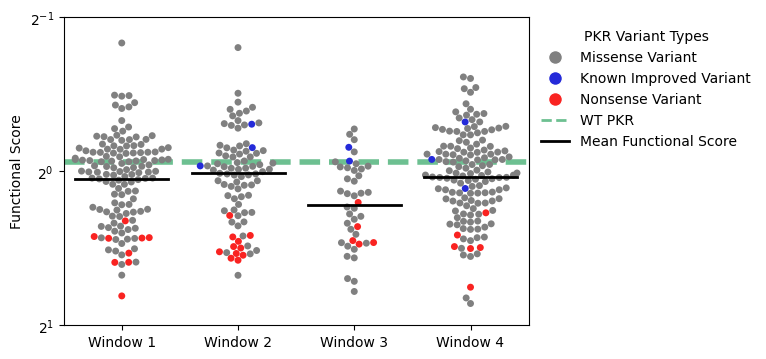

In [19]:
# plot regions
output_file = '../img/pkr-data/pkr-regions-swarmplot'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

# swarmplot
color_dict = {'WT':"#1DA5E4",'Nonsense':'#F92321',"Known Improved Variant":"#242AD9","Missense Variant":'gray'}

g = sns.swarmplot(
    x='pkr_regions',
    y='value', 
    hue='pkr_type', 
    data=df4,
    palette = color_dict,
    order=['Window 1','Window 2','Window 3', 'Window 4']
    #hue_order=['Resistant','STOP','Variant']
)
g.invert_yaxis()

g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365

#g.get_legend().remove()
#g.spines["left"].set_visible(False)

g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)


# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="pkr_regions",
    y="value",
    data=df4.query('pkr_type != "WT" and pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['Window 1','Window 2','Window 3', 'Window 4'],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),

]

g.legend(title='PKR Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

fig = g.get_figure()
for extension in ['.png','.svg']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

We found a statistically significant difference in Functional Score according to Region of Interest (One-way ANOVA, F(2)=5.7, p=.0008).  A Tukey post-hoc test revealed significant pairwise differences between Region 3 and Regions 1, 2, and 4 with an average difference in Functional Score of .128, .155, and .138 respectively (p<.004, .001, .001).  Note that nonsense mutations were removeed from calculating the mean and statistical significance between groups.

In [9]:
# one-way anova to reject null (no difference between means)
region_1 = df4.query('pkr_regions == "Region 1" and pkr_type != "Nonsense"')['value'].to_numpy()
region_2 = df4.query('pkr_regions == "Region 2" and pkr_type != "Nonsense"')['value'].to_numpy()
region_3 = df4.query('pkr_regions == "Region 3" and pkr_type != "Nonsense"')['value'].to_numpy()
region_4 = df4.query('pkr_regions == "Region 4" and pkr_type != "Nonsense"')['value'].to_numpy()

F, p = f_oneway(region_1,region_2,region_3,region_4)
print(F)
print(p)
print()
# post-hoc testing: Tukey's Honestly-Significant Difference
# statistic is the mean difference between the comparisons
result = tukey_hsd(region_1,region_2,region_3,region_4)
print(result)

5.6921275768463735
0.0008086066498298924

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.028     0.780    -0.048     0.103
 (0 - 2)     -0.128     0.004    -0.224    -0.032
 (0 - 3)      0.010     0.979    -0.055     0.075
 (1 - 0)     -0.028     0.780    -0.103     0.048
 (1 - 2)     -0.155     0.001    -0.258    -0.053
 (1 - 3)     -0.018     0.927    -0.092     0.056
 (2 - 0)      0.128     0.004     0.032     0.224
 (2 - 1)      0.155     0.001     0.053     0.258
 (2 - 3)      0.138     0.001     0.043     0.233
 (3 - 0)     -0.010     0.979    -0.075     0.055
 (3 - 1)      0.018     0.927    -0.056     0.092
 (3 - 2)     -0.138     0.001    -0.233    -0.043



/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


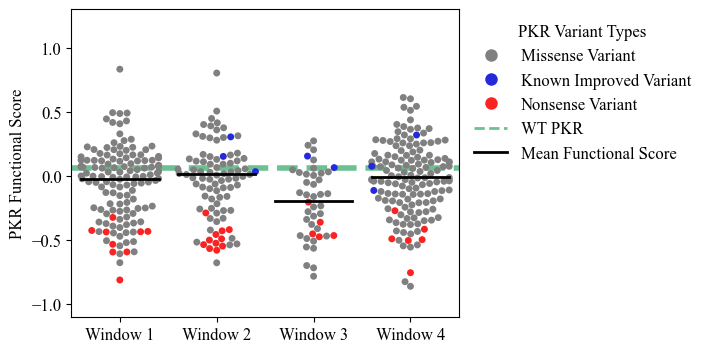

In [31]:
# plot regions
output_file = '../img/pkr-data/pkr-regions-swarmplot_FS'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (5,4)

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

# data
data = df4
data['Functional Score'] = -np.log2(data['value'])

# swarmplot
color_dict = {'WT':"#1DA5E4",'Nonsense':'#F92321',"Known Improved Variant":"#242AD9","Missense Variant":'gray'}

g = sns.swarmplot(
    x='pkr_regions',
    y='Functional Score', 
    hue='pkr_type', 
    data=df4,
    palette = color_dict,
    order=['Window 1','Window 2','Window 3', 'Window 4']
    #hue_order=['Resistant','STOP','Variant']
)

g.axhline(0.060867, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365

#g.get_legend().remove()
#g.spines["left"].set_visible(False)

g.set_ylim(bottom=-1.1, top=1.3)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="pkr_regions",
    y="Functional Score",
    data=data.query('pkr_type != "WT" and pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['Window 1','Window 2','Window 3', 'Window 4'],
    ax=g
)

y_axis_label = "PKR Functional Score"
g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),

]

g.legend(title='PKR Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

fig = g.get_figure()
for extension in ['.svg','.png']: 
    fig.savefig(f'{output_file}{extension}', bbox_inches='tight', dpi=300)

In [42]:
df4.query('pkr_regions == "Region 1" and pkr_type != "Nonsense"')['Functional Score'].to_numpy()

array([], dtype=float64)

In [44]:
df4['Functional Score'] = -np.log2(df4['value'])
# one-way anova to reject null (no difference between means)
region_1 = df4.query('pkr_regions == "Window 1" and pkr_type != "Nonsense"')['Functional Score'].to_numpy()
region_2 = df4.query('pkr_regions == "Window 2" and pkr_type != "Nonsense"')['Functional Score'].to_numpy()
region_3 = df4.query('pkr_regions == "Window 3" and pkr_type != "Nonsense"')['Functional Score'].to_numpy()
region_4 = df4.query('pkr_regions == "Window 4" and pkr_type != "Nonsense"')['Functional Score'].to_numpy()

F, p = f_oneway(region_1,region_2,region_3,region_4)
print(F)
print(p)
print()
# post-hoc testing: Tukey's Honestly-Significant Difference
# statistic is the mean difference between the comparisons
result = tukey_hsd(region_1,region_2,region_3,region_4)
print(result)

5.403250572548514
0.001197120657687675

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.039     0.760    -0.140     0.063
 (0 - 2)      0.166     0.006     0.036     0.295
 (0 - 3)     -0.015     0.968    -0.103     0.072
 (1 - 0)      0.039     0.760    -0.063     0.140
 (1 - 2)      0.204     0.001     0.066     0.343
 (1 - 3)      0.023     0.932    -0.077     0.123
 (2 - 0)     -0.166     0.006    -0.295    -0.036
 (2 - 1)     -0.204     0.001    -0.343    -0.066
 (2 - 3)     -0.181     0.002    -0.310    -0.053
 (3 - 0)      0.015     0.968    -0.072     0.103
 (3 - 1)     -0.023     0.932    -0.123     0.077
 (3 - 2)      0.181     0.002     0.053     0.310



../img/pkr-data/pkr-selection_fs.svg


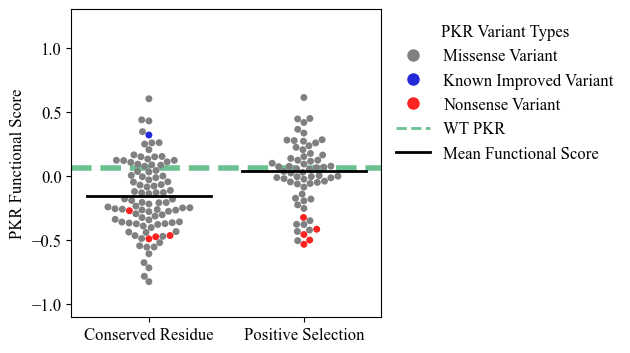

In [35]:
# plot conserved and positive selection residues
# functional score

output_file = '../img/pkr-data/pkr-selection_fs'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (4,4)

g = sns.swarmplot(
    x='Selection Pressure',
    y='Functional Score', 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4[df4['Selection Pressure'].notna()],
    order=sele_types,
)
g.axhline(0.060867, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365

g.set_ylim(bottom=-1.1, top=1.3)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="Selection Pressure",
    y="Functional Score",
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=sele_types,
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),

]
g.legend(title='PKR Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')
#g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types', 

fig = g.get_figure()
for extension in ['.svg']: 
    fig.savefig(f'{output_file}{extension}', bbox_inches='tight', dpi=300)
    print(f'{output_file}{extension}')

In [48]:
# stats: independent t-test (aka two-sample t test)
group1 = df4[df4["Selection Pressure"] == "Conserved Residue"].query('pkr_type != "Nonsense"')['Functional Score']
group2 = df4[df4["Selection Pressure"] == "Positive Selection"].query('pkr_type != "Nonsense"')['Functional Score']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants at conserved sites (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites under positive selection (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")


Group 1: -0.1563633404223267 0.2830001579028849
Group 2: 0.04050506372277082 0.23104676209111435
T statistic: -4.463757749370318
p-value: 1.5862830891782398e-05
Degrees of Freedom: 148

The difference in mean Functional Score between PKR variants at conserved sites (M=-0.16, SD=0.28) and sites under positive selection (M=0.04, SD=0.23 is significant (Independent T-test, t(148)=-4.46, p=2e-05).


Group 1: -0.004849905188539579 0.2551182221396659
Group 2: -0.10186595792793467 0.317928674587776

T statistic: 2.9901266437147336
p-value: 0.0029741484300294854
Degrees of Freedom: 372

The difference in mean Functional Score between PKR variants that do not contact K3L (M=-0.0, SD=0.26) and sites that contact K3L (M=-0.1, SD=0.32 is significant (Independent T-test, t(372)=2.99, p=0.00297).


/opt/homebrew/Caskroom/mambaforge/base/envs/data_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


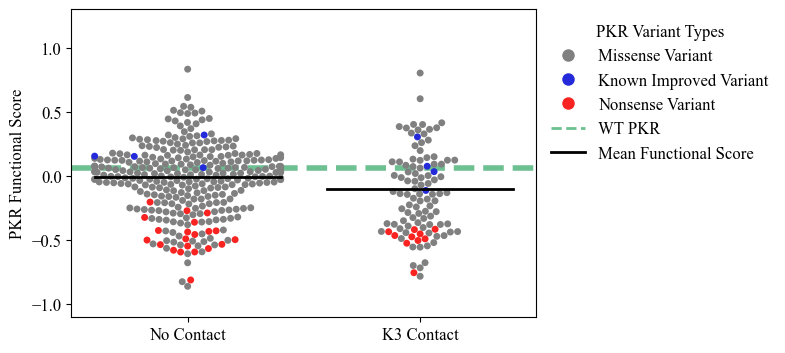

In [32]:
# try contact residues with K3L
# Functional Scorew

# plot conserved and positive selection residues
output_file = '../img/pkr-data/pkr-k3l-contact_fs'

x_axis = 'k3l_pdb'
y_axis = 'Functional Score'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4,
    order=['No Contact', 'K3 Contact'],
)
g.axhline(0.0608678, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.set_ylim(bottom=-1.1, top=1.3)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['No Contact', 'K3 Contact'],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types'
g.legend(title='PKR Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')

# stats: independent t-test (aka two-sample t test)
group1 = df4[df4[x_axis] == "No Contact"].query('pkr_type != "Nonsense"')['Functional Score']
group2 = df4[df4[x_axis] == "K3 Contact"].query('pkr_type != "Nonsense"')['Functional Score']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants that do not contact K3L (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact K3L (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

fig = g.get_figure()
for extension in ['.svg','.png']: 
    fig.savefig(f'{output_file}{extension}', bbox_inches='tight', dpi=300)

In [ ]:
# stats: independent t-test (aka two-sample t test)
group1 = df4[df4["Selection Pressure"] == "Conserved Residue"].query('pkr_type != "Nonsense"')['Functinoal Score']
group2 = df4[df4["Selection Pressure"] == "Positive Selection"].query('pkr_type != "Nonsense"')['Functional Score']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants at conserved sites (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites under positive selection (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")


In [ ]:
### OLD PLOTS

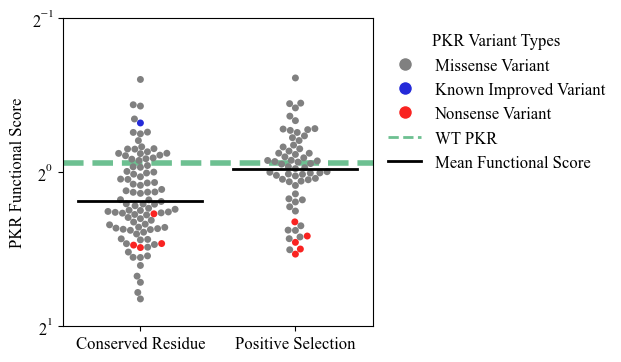

In [34]:
# plot conserved and positive selection residues

output_file = '../img/pkr-data/pkr-selection'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (4,4)

g = sns.swarmplot(
    x='Selection Pressure',
    y='value', 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4[df4['Selection Pressure'].notna()],
    order=sele_types,
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="Selection Pressure",
    y="value",
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=sele_types,
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),

]
g.legend(title='PKR Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')
#g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types', 

fig = g.get_figure()
for extension in ['.png','.svg']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

In [17]:
# stats: independent t-test (aka two-sample t test)
group1 = df4[df4["Selection Pressure"] == "Conserved Residue"].query('pkr_type != "Nonsense"')['value']
group2 = df4[df4["Selection Pressure"] == "Positive Selection"].query('pkr_type != "Nonsense"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants at conserved sites (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites under positive selection (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")


Group 1: 1.1357139155387161 0.22198889026666072
Group 2: 0.9847715682203908 0.1610593040279324
T statistic: 4.507781957748166
p-value: 1.3227274821742939e-05
Degrees of Freedom: 148

The difference in mean Functional Score between PKR variants at conserved sites (M=1.14, SD=0.22) and sites under positive selection (M=0.98, SD=0.16 is significant (Independent T-test, t(148)=4.51, p=1e-05).


The difference in mean Functional Score between PKR variants at conserved sites (M=1.14, SD=0.22) and sites under positive selection (M=0.98, SD=0.16 is significant (Independent T-test, t(148)=4.51, p=1e-05).  Note that Nonsense variant values are excluded from group means and t-tests.


Group 1: 1.0194552837854376 0.18793114408681802
Group 2: 1.098787882025915 0.23773204881360302

T statistic: -3.3021824111128155
p-value: 0.0010522784142424047
Degrees of Freedom: 372

The difference in mean Functional Score between PKR variants that do not contact K3L (M=1.02, SD=0.19) and sites that contact K3L (M=1.1, SD=0.24 is significant (Independent T-test, t(372)=-3.3, p=0.00105).


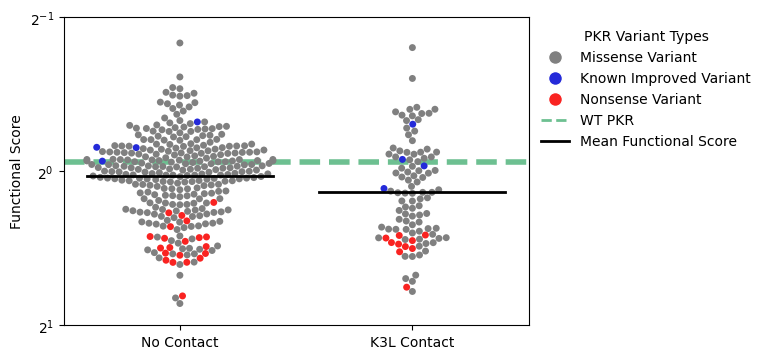

In [23]:
# try contact residues with K3L
# plot conserved and positive selection residues
output_file = '../img/pkr-data/pkr-k3l-contact'

x_axis = 'k3l_pdb'
y_axis = 'value'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4,
    order=['No Contact', 'K3L Contact'],
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['No Contact', 'K3L Contact'],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Functional Score', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types'
g.legend(title='PKR Variant Types', handles=legend_elements,bbox_to_anchor=(1.0, 1.0), frameon=False, loc='upper left')

# stats: independent t-test (aka two-sample t test)
group1 = df4[df4[x_axis] == "No Contact"].query('pkr_type != "Nonsense"')['value']
group2 = df4[df4[x_axis] == "K3L Contact"].query('pkr_type != "Nonsense"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants that do not contact K3L (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact K3L (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

fig = g.get_figure()
for extension in ['.png','.svg']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

Group 1: 1.0597484908242396 0.2138271502379432
Group 2: 1.0869947480688802 0.23879985245063495

T statistic: -1.083326904112169
p-value: 0.27931106841316083
Degrees of Freedom: 403

The difference in mean Functional Score between PKR variants that do not contact K3L (M=1.06, SD=0.21) and sites that contact K3L (M=1.09, SD=0.24 is significant (Independent T-test, t(403)=-1.08, p=0.27931).


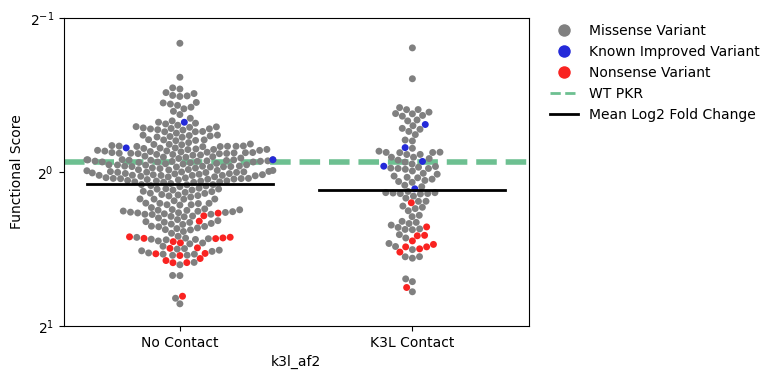

In [74]:
# k3l AF2 contacts are not strong predictors
# The difference in mean Functional Score between PKR variants that do not contact K3L (M=1.06, SD=0.21) and sites that contact K3L (M=1.09, SD=0.24 is significant (Independent T-test, t(403)=-1.08, p=0.27931).

The difference in mean Functional Score between PKR variants that do not contact K3L (M=1.05, SD=0.21) and sites that contact K3L (M=1.13, SD=0.25 is significant (Independent T-test, t(403)=-3.3662003710377433, p=0.0008353028418208159).

Group 1: 1.0425261135347055 0.20988186037025544
Group 2: 1.1155218396426112 0.2337109953315906

T statistic: -3.170168876869125
p-value: 0.0016398878737454178
Degrees of Freedom: 403

The difference in mean Functional Score between PKR variants that do not contact K3L (M=1.04, SD=0.21) and sites that contact K3L (M=1.12, SD=0.23 is significant (Independent T-test, t(403)=-3.17, p=0.00164).


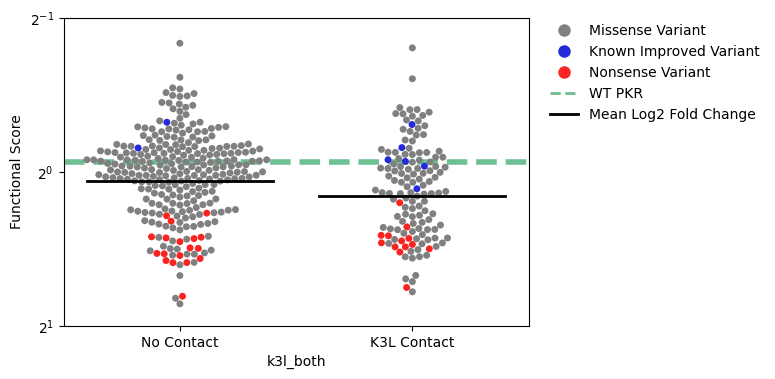

In [75]:
# both PDB and AF2 K3L contacts are not as strong of predictors as PDB alone
# The difference in mean Functional Score between PKR variants that do not contact K3L (M=1.04, SD=0.21) and sites that contact K3L (M=1.12, SD=0.23 is significant (Independent T-test, t(403)=-3.17, p=0.00164).

Group 1: 1.0286553884847367 0.19605043046355497
Group 2: 1.0852247557673718 0.23179506118494878

T statistic: -2.1108137224724723
p-value: 0.03545514904553119
Degrees of Freedom: 372

The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M=1.03, SD=0.2) and sites that contact eIF2alpha (M=1.09, SD=0.23 is significant (Independent T-test, t(372)=-2.11, p=0.03546).


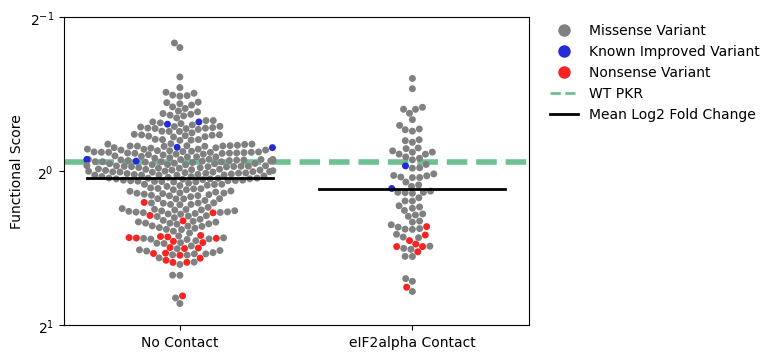

In [186]:
# try contact residues with K3L
# plot conserved and positive selection residues
output_file = '../img/2-3_pkr-data/pkr-eif2a-contact'

x_axis = 'eif2a_pdb'
y_axis = 'value'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4,
    order=['No Contact', 'eIF2alpha Contact'],
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['No Contact', 'eIF2alpha Contact'],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types'

fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats: independent t-test (aka two-sample t test)
group1 = df4[df4[x_axis] == "No Contact"].query('pkr_type != "Nonsense"')['value']
group2 = df4[df4[x_axis] == "eIF2alpha Contact"].query('pkr_type != "Nonsense"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact eIF2alpha (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M=1.03, SD=0.2) and sites that contact eIF2alpha (M=1.09, SD=0.23 is significant (Independent T-test, t(372)=-2.11, p=0.03546).


Group 1: 1.0188871576133767 0.18705959321772347
Group 2: 1.0861656086919358 0.23293503098347873

T statistic: -2.9635684727078333
p-value: 0.0032366404955592497
Degrees of Freedom: 372

The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M=1.02, SD=0.19) and sites that contact eIF2alpha (M=1.09, SD=0.23 is significant (Independent T-test, t(372)=-2.96, p=0.00324).


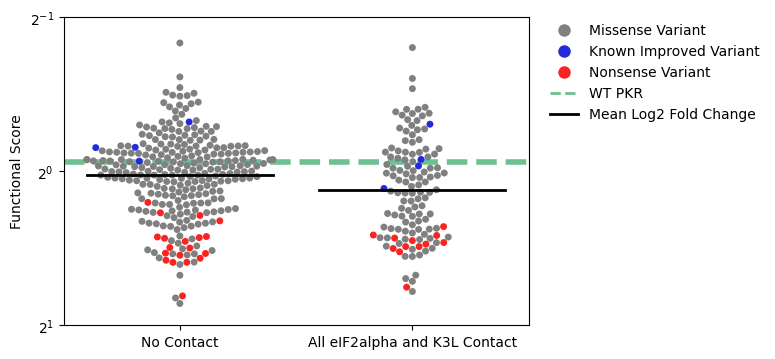

In [189]:
# Union of all eif2a and K3L contacts

# try contact residues with K3L
# plot conserved and positive selection residues
output_file = '../img/2-3_pkr-data/pkr-k3l-eif2a-contact'

x_axis = 'all_eif2a_k3l'
y_axis = 'value'
contact_label = 'All eIF2alpha and K3L Contact'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4,
    order=['No Contact', contact_label],
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['No Contact', contact_label],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types'

fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats: independent t-test (aka two-sample t test)
group1 = df4[df4[x_axis] == "No Contact"].query('pkr_type != "Nonsense"')['value']
group2 = df4[df4[x_axis] == contact_label].query('pkr_type != "Nonsense"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact eIF2alpha (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

Group 1: 1.0285430377440243 0.19621812087508103
Group 2: 1.108120376059583 0.23984510408809628

T statistic: -2.60638229801741
p-value: 0.009518176173332593
Degrees of Freedom: 372

The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M=1.03, SD=0.2) and sites that contact eIF2alpha (M=1.11, SD=0.24 is significant (Independent T-test, t(372)=-2.61, p=0.00952).


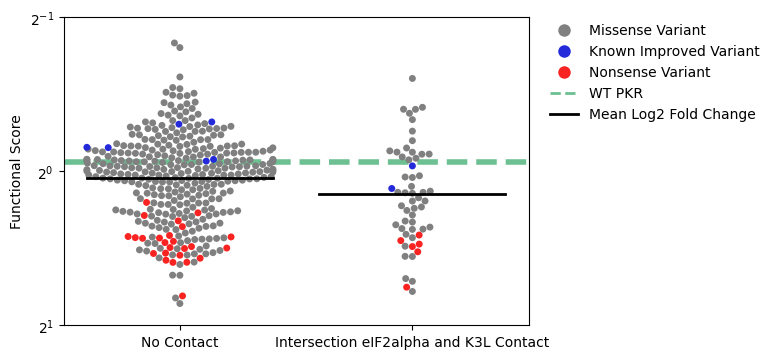

In [193]:
# intersection of K3L and eIF2a contacts
output_file = '../img/2-3_pkr-data/pkr-k3l-eif2a-intersection'
x_axis = 'intersection_eif2a_k3l'
y_axis = 'value'
contact_label = 'Intersection eIF2alpha and K3L Contact'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4,
    order=['No Contact', contact_label],
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['No Contact', contact_label],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types'

fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats: independent t-test (aka two-sample t test)
group1 = df4[df4[x_axis] == "No Contact"].query('pkr_type != "Nonsense"')['value']
group2 = df4[df4[x_axis] == contact_label].query('pkr_type != "Nonsense"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact eIF2alpha (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

Group 1: 1.0401037341522992 0.20447915349540194
Group 2: 1.0268409240222323 0.20388783197065505

T statistic: 0.28224834508246216
p-value: 0.7779100555501232
Degrees of Freedom: 372

The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M=1.04, SD=0.2) and sites that contact eIF2alpha (M=1.03, SD=0.2 is significant (Independent T-test, t(372)=0.28, p=0.77791).


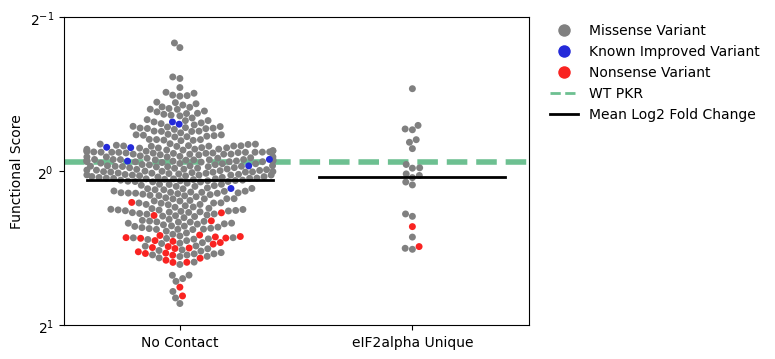

In [194]:
# contact sites unique to eIF2a
output_file = '../img/2-3_pkr-data/pkr-eif2a-unique'
x_axis = 'eif2a_unique'
y_axis = 'value'
contact_label = 'eIF2alpha Unique'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4,
    order=['No Contact', contact_label],
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['No Contact', contact_label],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types'

fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats: independent t-test (aka two-sample t test)
group1 = df4[df4[x_axis] == "No Contact"].query('pkr_type != "Nonsense"')['value']
group2 = df4[df4[x_axis] == contact_label].query('pkr_type != "Nonsense"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact eIF2alpha (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

Group 1: 1.0331166726252607 0.1990066123798133
Group 2: 1.087719110032495 0.2375491521549613

T statistic: -1.653419063213726
p-value: 0.09908919882797178
Degrees of Freedom: 372

The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M=1.03, SD=0.2) and sites that contact eIF2alpha (M=1.09, SD=0.24 is NOT significant (Independent T-test, t(372)=-1.65, p=0.09909).


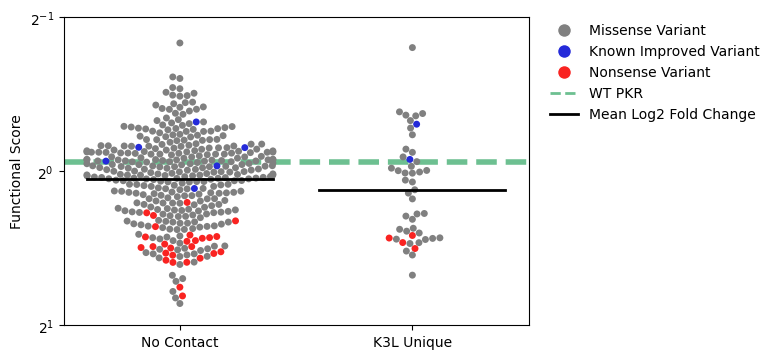

In [196]:
# unique K3L contact sites
output_file = '../img/2-3_pkr-data/pkr-k3l-unique'
x_axis = 'k3l_unique'
y_axis = 'value'
contact_label = 'K3L Unique'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4,
    order=['No Contact', contact_label],
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['No Contact', contact_label],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types'

fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats: independent t-test (aka two-sample t test)
group1 = df4[df4[x_axis] == "No Contact"].query('pkr_type != "Nonsense"')['value']
group2 = df4[df4[x_axis] == contact_label].query('pkr_type != "Nonsense"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants that do not contact eIF2alpha (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and sites that contact eIF2alpha (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is NOT significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

Group 1: 1.0224754278154058 0.1912522937278751
Group 2: 1.0430200069303304 0.20698100124212962

T statistic: -0.7413065601892445
p-value: 0.45897529304403095
Degrees of Freedom: 372

The difference in mean Functional Score between PKR variants that do NOT change AA group (M=1.02, SD=0.19) and variants that do change AA group (M=1.04, SD=0.21 is NOT significant (Independent T-test, t(372)=-0.74, p=0.45898).


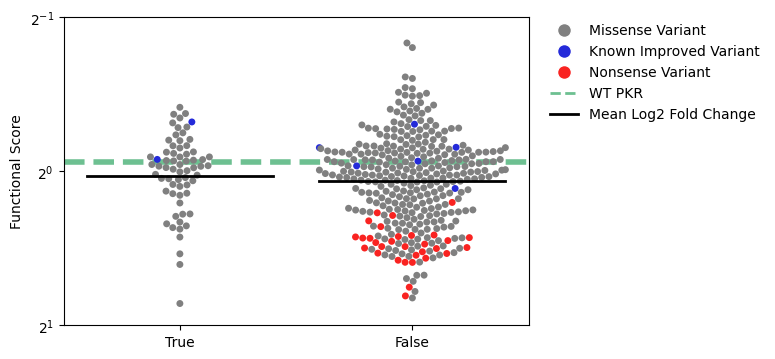

In [199]:
# change aa group

# unique K3L contact sites
output_file = '../img/2-3_pkr-data/pkr-k3l-unique'
x_axis = 'aa_same_type'
y_axis = 'value'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,4)

g = sns.swarmplot(
    x=x_axis,
    y=y_axis, 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4,
    order=[True,False],
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x=x_axis,
    y=y_axis,
    data=df4.query('pkr_type != "Nonsense"'),
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=[True,False],
    ax=g
)

g.set_ylabel(f'{y_axis_label}')
g.set_xlabel('')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types'

fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

# stats: independent t-test (aka two-sample t test)
group1 = df4[df4[x_axis] == True].query('pkr_type != "Nonsense"')['value']
group2 = df4[df4[x_axis] == False].query('pkr_type != "Nonsense"')['value']
print('Group 1:', group1.mean(), group1.std())
print('Group 2:', group2.mean(), group2.std())
print()

t_statistic, p_value = ttest_ind(group1,group2)
print('T statistic:',t_statistic)
print('p-value:',p_value)

degree_freedom = len(group1) + len(group2) - 2
print('Degrees of Freedom:',degree_freedom)

print()
print(f"The difference in mean Functional Score between PKR variants that do NOT change AA group (M={np.around(group1.mean(), 2)}, SD={np.around(group1.std(),2)}) and variants that do change AA group (M={np.around(group2.mean(), 2)}, SD={np.around(group2.std(),2)} is NOT significant (Independent T-test, t({degree_freedom})={np.around(t_statistic,2)}, p={np.around(p_value,5)}).")

The difference in mean Functional Score between PKR variants that do NOT change AA group (M=1.02, SD=0.19) and variants that do change AA group (M=1.04, SD=0.21 is NOT significant (Independent T-test, t(372)=-0.74, p=0.45898).

Text(0.5, 14.722222222222216, 'Change from this AA group')

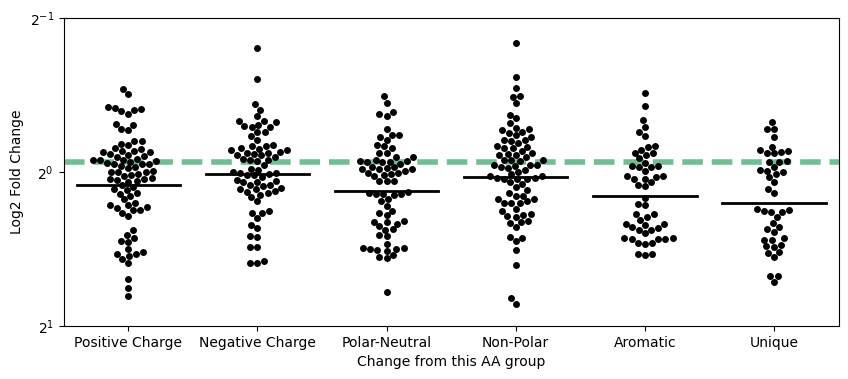

In [95]:
df4['aa_wt'] = df4['pkr'].str.split('-').str[1].str[0].map(aa_map)
df4['aa_nonsynonymous'] = df4['pkr'].str.split('-').str[1].str[-1].map(aa_map)

df4['aa_wt_full'] = df4['aa_wt'].map(full_cat_map)
df4['aa_nonsynonymous_full'] = df4['aa_nonsynonymous'].map(full_cat_map)


plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,4)

g = sns.swarmplot(
    x='aa_wt',
    y='value', 
    color='black', 
    data=df4,
    #palette = color_dict,
    order=aa_categories[:-1],
    #hue_order=['Resistant','STOP','Variant'],
    #estimator='mean'
)


g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)


# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="aa_wt",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_categories[:-1],
    ax=g
)
g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Change from this AA group')

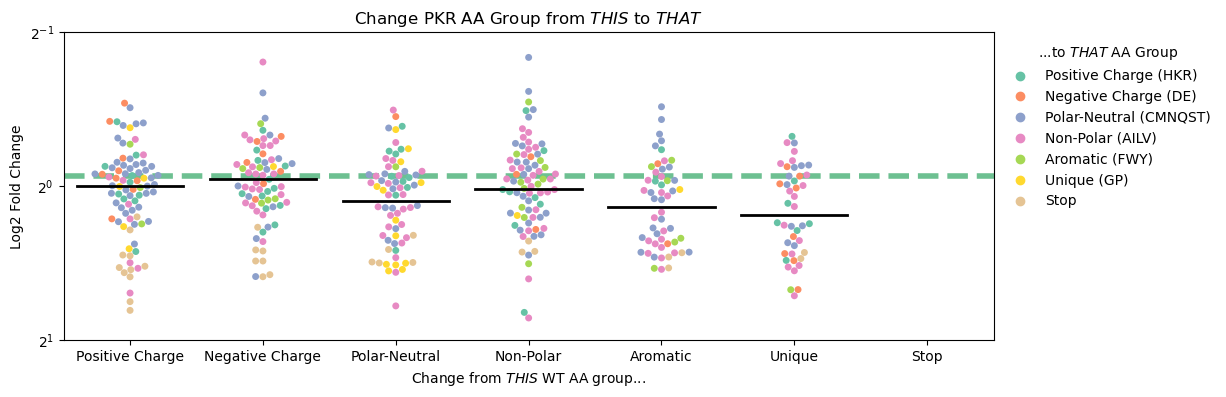

In [200]:
output_file = '../img/2-3_pkr-data/pkr-this-to-that'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (12,4)

g = sns.swarmplot(
    x='aa_wt',
    y='value', 
    #color='black', 
    data=df4,
    palette = 'Set2',
    order=aa_categories,
    hue='aa_nonsynonymous_full',
    hue_order=aa_categories_full,
    #estimator='mean'
)


g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)


# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="aa_wt",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_categories,
    ax=g
)
g.set_title('Change PKR AA Group from $\it{THIS}$ to $\it{THAT}$')
g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Change from $\it{THIS}$ WT AA group...')

g.legend(title='...to $\it{THAT}$ AA Group',bbox_to_anchor=(1.0, 1.0), loc='upper left', frameon=False)

fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

In [208]:
# one-way anova to reject null (no difference between means)
positive = df4.query('aa_wt == "Positive Charge" and pkr_type != "Nonsense"')['value'].to_numpy()
negative = df4.query('aa_wt == "Negative Charge" and pkr_type != "Nonsense"')['value'].to_numpy()
polar_neut = df4.query('aa_wt == "Polar-Neutral" and pkr_type != "Nonsense"')['value'].to_numpy()
nonpolar = df4.query('aa_wt == "Non-Polar" and pkr_type != "Nonsense"')['value'].to_numpy()
aromatic = df4.query('aa_wt == "Aromatic" and pkr_type != "Nonsense"')['value'].to_numpy()
unique = df4.query('aa_wt == "Unique" and pkr_type != "Nonsense"')['value'].to_numpy()

F, p = f_oneway(positive,negative,polar_neut,nonpolar,aromatic,unique)
print(F)
print(p)
print()
# post-hoc testing: Tukey's Honestly-Significant Difference
# statistic is the mean difference between the comparisons
result = tukey_hsd(positive,negative,polar_neut,nonpolar,aromatic,unique)
print(result)

5.771749447429847
3.815263583114599e-05

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.031     0.941    -0.065     0.127
 (0 - 2)     -0.068     0.339    -0.164     0.029
 (0 - 3)     -0.013     0.999    -0.105     0.080
 (0 - 4)     -0.098     0.077    -0.202     0.006
 (0 - 5)     -0.138     0.005    -0.248    -0.029
 (1 - 0)     -0.031     0.941    -0.127     0.065
 (1 - 2)     -0.099     0.051    -0.197     0.000
 (1 - 3)     -0.044     0.778    -0.139     0.052
 (1 - 4)     -0.129     0.007    -0.236    -0.023
 (1 - 5)     -0.169     0.000    -0.281    -0.057
 (2 - 0)      0.068     0.339    -0.029     0.164
 (2 - 1)      0.099     0.051    -0.000     0.197
 (2 - 3)      0.055     0.564    -0.040     0.150
 (2 - 4)     -0.031     0.962    -0.137     0.076
 (2 - 5)     -0.071     0.459    -0.183     0.041
 (3 - 0)      0.013     0.999    -0.080     0.105
 (3 - 1)      0.044     0.778    -0.052  

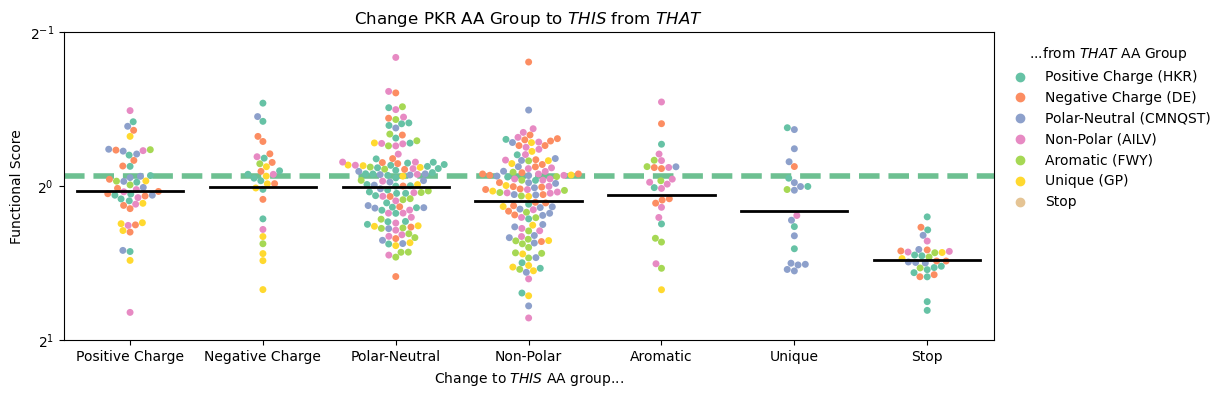

In [209]:
output_file = '../img/2-3_pkr-data/pkr-to-this-from-that'

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (12,4)

g = sns.swarmplot(
    x='aa_nonsynonymous',
    y='value', 
    #color='black', 
    data=df4,
    palette = 'Set2',
    order=aa_categories,
    hue='aa_wt_full',
    hue_order=aa_categories_full,
    #estimator='mean'
)

g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="aa_nonsynonymous",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_categories,
    ax=g
)

g.legend(title='...from $\it{THAT}$ AA Group',bbox_to_anchor=(1.0, 1.0), loc='upper left', frameon=False)

g.set_title('Change PKR AA Group to $\it{THIS}$ from $\it{THAT}$')
g.set_ylabel('Functional Score')
g.set_xlabel('Change to $\it{THIS}$ AA group...')

fig = g.get_figure()
for extension in ['.png','.pdf']: fig.savefig(f'{output_file}{extension}', bbox_inches='tight')

In [210]:
# one-way anova to reject null (no difference between means)
positive = df4.query('aa_nonsynonymous == "Positive Charge"')['value'].to_numpy()
negative = df4.query('aa_nonsynonymous == "Negative Charge"')['value'].to_numpy()
polar_neut = df4.query('aa_nonsynonymous == "Polar-Neutral"')['value'].to_numpy()
nonpolar = df4.query('aa_nonsynonymous == "Non-Polar"')['value'].to_numpy()
aromatic = df4.query('aa_nonsynonymous == "Aromatic"')['value'].to_numpy()
unique = df4.query('aa_nonsynonymous == "Unique"')['value'].to_numpy()
stops = df4.query('aa_nonsynonymous == "Stop"')['value'].to_numpy()

F, p = f_oneway(positive,negative,polar_neut,nonpolar,aromatic,unique,stops)
print(F)
print(p)
print()
# post-hoc testing: Tukey's Honestly-Significant Difference
# statistic is the mean difference between the comparisons
result = tukey_hsd(positive,negative,polar_neut,nonpolar,aromatic,unique,stops)
print(result)

17.394829784151632
6.730396127194992e-18

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.018     1.000    -0.117     0.153
 (0 - 2)      0.017     0.998    -0.080     0.115
 (0 - 3)     -0.048     0.762    -0.146     0.049
 (0 - 4)     -0.017     1.000    -0.155     0.121
 (0 - 5)     -0.095     0.514    -0.247     0.057
 (0 - 6)     -0.372     0.000    -0.505    -0.239
 (1 - 0)     -0.018     1.000    -0.153     0.117
 (1 - 2)     -0.001     1.000    -0.120     0.119
 (1 - 3)     -0.066     0.650    -0.186     0.053
 (1 - 4)     -0.035     0.994    -0.189     0.119
 (1 - 5)     -0.113     0.412    -0.280     0.054
 (1 - 6)     -0.390     0.000    -0.540    -0.240
 (2 - 0)     -0.017     0.998    -0.115     0.080
 (2 - 1)      0.001     1.000    -0.119     0.120
 (2 - 3)     -0.066     0.129    -0.141     0.009
 (2 - 4)     -0.034     0.982    -0.157     0.088
 (2 - 5)     -0.112     0.200    -0.251 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


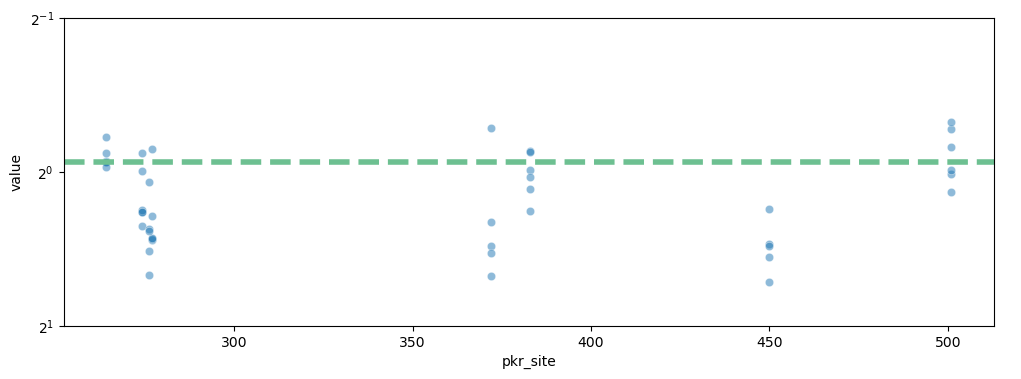

In [122]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (12,4)

g = sns.scatterplot(
    data=df4.query('aa_wt == "Unique"'),
    x='pkr_site',
    y='value',
    #hue='k3l_pdb'
    alpha=.5
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)
g.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', frameon=False)

In [109]:
# check change to unique
df4.query('aa_nonsynonymous == "Unique" and value > 1.118834 and not aa_same_type').sort_values('value', ascending=False)

,pkr,pkr_type,pkr_regions,variable,value,aa_same_type,aa_wt,aa_nonsynonymous,pkr_site,WT AA,Nonsynonymous AA,aa_wt_full,aa_nonsynonymous_full
105,PKR-T487P,Missense Variant,Region 4,mean_fold_change,1.467401,False,Polar-Neutral,Unique,487,T,P,Polar-Neutral (CMNQST),Unique (GP)
307,PKR-T491P,Missense Variant,Region 4,mean_fold_change,1.457690,False,Polar-Neutral,Unique,491,T,P,Polar-Neutral (CMNQST),Unique (GP)
358,PKR-T373P,Missense Variant,Region 2,mean_fold_change,1.428421,False,Polar-Neutral,Unique,373,T,P,Polar-Neutral (CMNQST),Unique (GP)
367,PKR-T258P,Missense Variant,Region 1,mean_fold_change,1.424406,False,Polar-Neutral,Unique,258,T,P,Polar-Neutral (CMNQST),Unique (GP)
388,PKR-S275P,Missense Variant,Region 1,mean_fold_change,1.417318,False,Polar-Neutral,Unique,275,S,P,Polar-Neutral (CMNQST),Unique (GP)
326,PKR-R453G,Missense Variant,Region 3,mean_fold_change,1.328054,False,Positive Charge,Unique,453,R,G,Positive Charge (HKR),Unique (GP)
387,PKR-S504P,Missense Variant,Region 4,mean_fold_change,1.252790,False,Polar-Neutral,Unique,504,S,P,Polar-Neutral (CMNQST),Unique (GP)
147,PKR-R262G,Missense Variant,Region 1,mean_fold_change,1.201956,False,Positive Charge,Unique,262,R,G,Positive Charge (HKR),Unique (GP)
404,PKR-S492P,Missense Variant,Region 4,mean_fold_change,1.167916,False,Polar-Neutral,Unique,492,S,P,Polar-Neutral (CMNQST),Unique (GP)
302,PKR-A488P,Missense Variant,Region 4,mean_fold_change,1.143383,False,Non-Polar,Unique,488,A,P,Non-Polar (AILV),Unique (GP)


In [45]:
# statistics
# one-way anova to reject null (no difference between means
nonsyn_positive = df4.query('aa_nonsynonymous == "Positive Charge"')['value'].to_numpy()
nonsyn_negative = df4.query('aa_nonsynonymous == "Negative Charge"')['value'].to_numpy()
nonsyn_neutral = df4.query('aa_nonsynonymous == "Polar-Neutral"')['value'].to_numpy()
nonsyn_nonpolar = df4.query('aa_nonsynonymous == "Non-Polar"')['value'].to_numpy()
nonsyn_aromatic = df4.query('aa_nonsynonymous == "Aromatic"')['value'].to_numpy()
nonsyn_unique = df4.query('aa_nonsynonymous == "Unique"')['value'].to_numpy()
nonsyn_stop = df4.query('aa_nonsynonymous == "Stop"')['value'].to_numpy()


F, p = f_oneway(nonsyn_positive, nonsyn_negative,nonsyn_neutral, nonsyn_nonpolar, nonsyn_aromatic, nonsyn_unique, nonsyn_stop)
print(F)
print(p)

17.394829784151632
6.730396127194992e-18


In [46]:
# post-hoc testing: Tukey's Honestly-Significant Difference
# statistic is the mean difference between the comparisons
result = tukey_hsd(nonsyn_positive, nonsyn_negative,nonsyn_neutral, nonsyn_nonpolar, nonsyn_aromatic, nonsyn_unique, nonsyn_stop)
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.018     1.000    -0.117     0.153
 (0 - 2)      0.017     0.998    -0.080     0.115
 (0 - 3)     -0.048     0.762    -0.146     0.049
 (0 - 4)     -0.017     1.000    -0.155     0.121
 (0 - 5)     -0.095     0.514    -0.247     0.057
 (0 - 6)     -0.372     0.000    -0.505    -0.239
 (1 - 0)     -0.018     1.000    -0.153     0.117
 (1 - 2)     -0.001     1.000    -0.120     0.119
 (1 - 3)     -0.066     0.650    -0.186     0.053
 (1 - 4)     -0.035     0.994    -0.189     0.119
 (1 - 5)     -0.113     0.412    -0.280     0.054
 (1 - 6)     -0.390     0.000    -0.540    -0.240
 (2 - 0)     -0.017     0.998    -0.115     0.080
 (2 - 1)      0.001     1.000    -0.119     0.120
 (2 - 3)     -0.066     0.129    -0.141     0.009
 (2 - 4)     -0.034     0.982    -0.157     0.088
 (2 - 5)     -0.112     0.200    -0.251     0.026
 (2 - 6)     -0.389     0.000   

In [25]:
df4['WT AA'] = df4['pkr'].str.split('-').str[1].str[0]
df4['Nonsynonymous AA'] = df4['pkr'].str.split('-').str[1].str[-1]

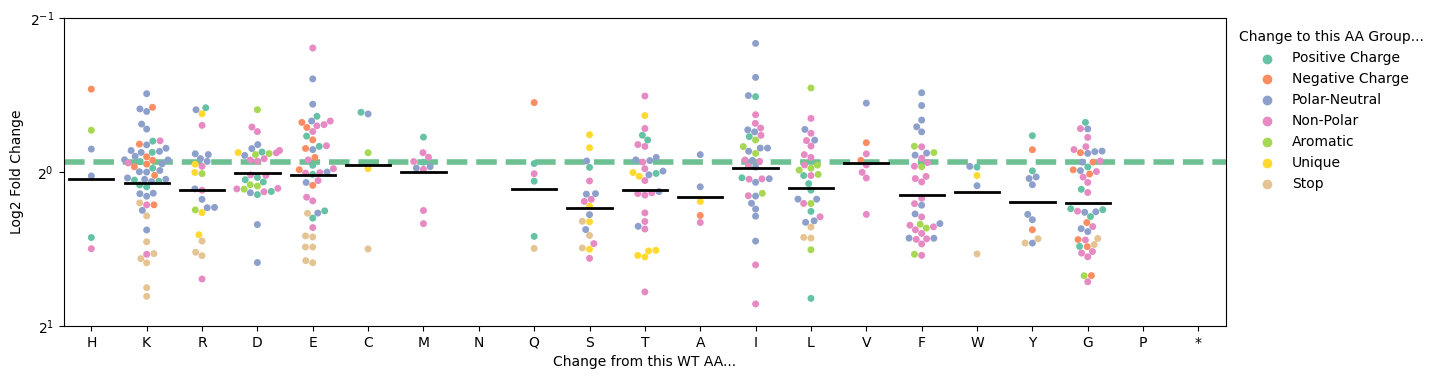

In [81]:
df4['WT AA'] = df4['pkr'].str.split('-').str[1].str[0]
df4['Nonsynonymous AA'] = df4['pkr'].str.split('-').str[1].str[-1]

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (15,4)

g = sns.swarmplot(
    x='WT AA',
    y='value', 
    #color='black', 
    data=df4,
    palette = 'Set2',
    hue='aa_nonsynonymous',
    order=aa_list,
    hue_order=aa_categories,
    #estimator='mean'
)


g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="WT AA",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_list,
    ax=g
)

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Change from this WT AA...')

g.legend(title='Change to this AA Group...',bbox_to_anchor=(1.0, 1.0), loc='upper left', frameon=False)

In [125]:
df4['WT AA'].unique()

array(['F', 'M', 'Y', 'E', 'K', 'G', 'R', 'I', 'H', 'T', 'S', 'D', 'W',
       'L', 'V', 'A', 'C', 'Q'], dtype=object)

/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 14.722222222222216, 'Nonsynonymous change to this AA')

/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the mark

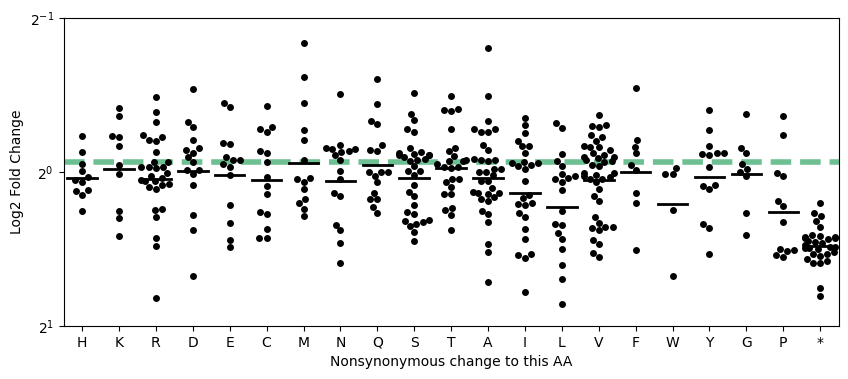

In [27]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,4)

g = sns.swarmplot(
    x='Nonsynonymous AA',
    y='value', 
    color='black', 
    data=df4,
    #palette = color_dict,
    order=aa_list,
    #hue_order=['Resistant','STOP','Variant'],
    #estimator='mean'
)


g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="Nonsynonymous AA",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=aa_list,
    ax=g
)

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('Nonsynonymous change to this AA')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Aromatic to Aromatic'),
  Text(1, 0, 'Aromatic to Negative Charge'),
  Text(2, 0, 'Aromatic to Non-Polar'),
  Text(3, 0, 'Aromatic to Polar-Neutral'),
  Text(4, 0, 'Aromatic to Positive Charge'),
  Text(5, 0, 'Aromatic to Stop'),
  Text(6, 0, 'Aromatic to Unique'),
  Text(7, 0, 'Negative Charge to Aromatic'),
  Text(8, 0, 'Negative Charge to Negative Charge'),
  Text(9, 0, 'Negative Charge to Non-Polar'),
  Text(10, 0, 'Negative Charge to Polar-Neutral'),
  Text(11, 0, 'Negative Charge to Positive Charge'),
  Text(12, 0, 'Negative Charge to Stop'),
  Text(13, 0, 'Negative Charge to Unique'),
  Text(14, 0, 'Non-Polar to Aromatic'),
  Text(15, 0, 'Non-Polar to Negative Charge'),
  Text(16, 0, 'Non-Polar to Non-Polar'),
  Text(17, 0, 'Non-Polar to Polar-Neutral'),
  Text(18, 0, 'Non-Polar

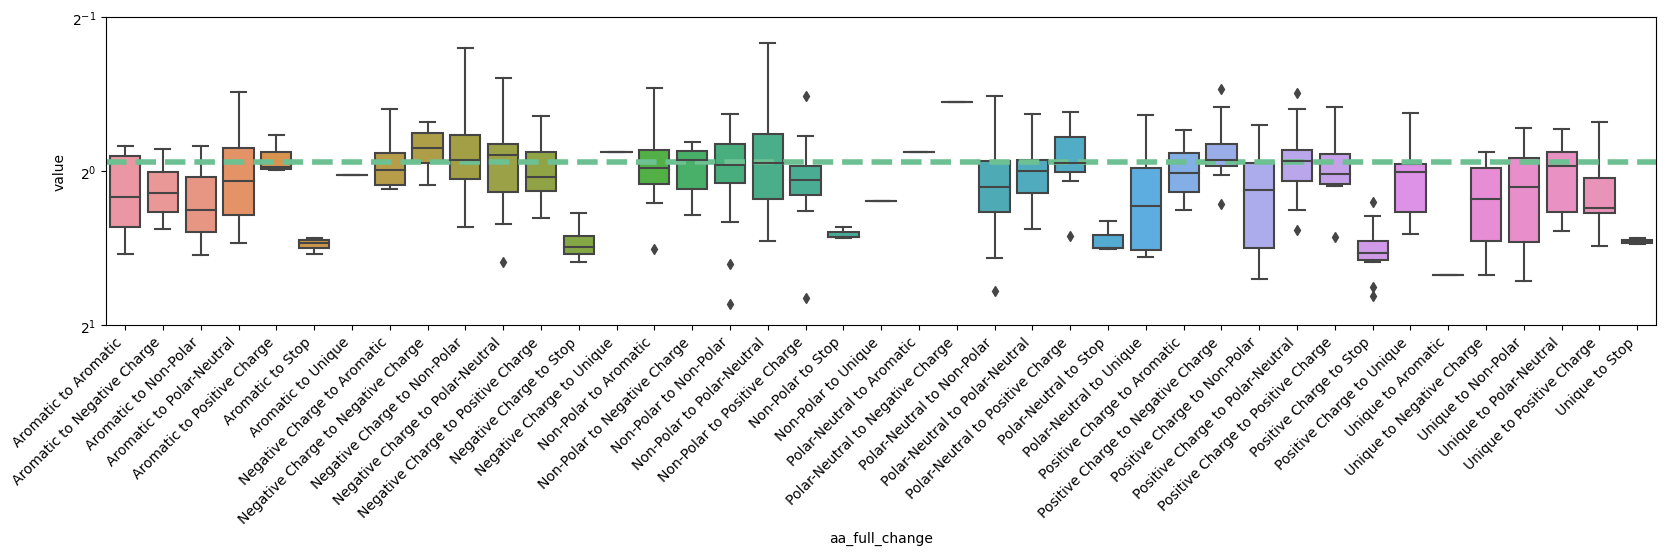

In [29]:
df4['aa_full_change'] = df4['aa_wt'] + " to " + df4['aa_nonsynonymous']

aa_full_change_mean_dict = df4.groupby('aa_full_change')['value'].mean().to_dict()
alph_order = list(aa_full_change_mean_dict.keys())

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,4)

g = sns.boxplot(
    x='aa_full_change',
    y='value', 
    #hue='aa_full_change', 
    data=df4,
    #palette = color_dict,
    order=alph_order,
    #hue_order=[alph_order]
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

plt.xticks(rotation=45, ha="right")

/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 14.722222222222216, 'AA Group Changes from A to B')

/opt/homebrew/Caskroom/mambaforge/base/envs/stats_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


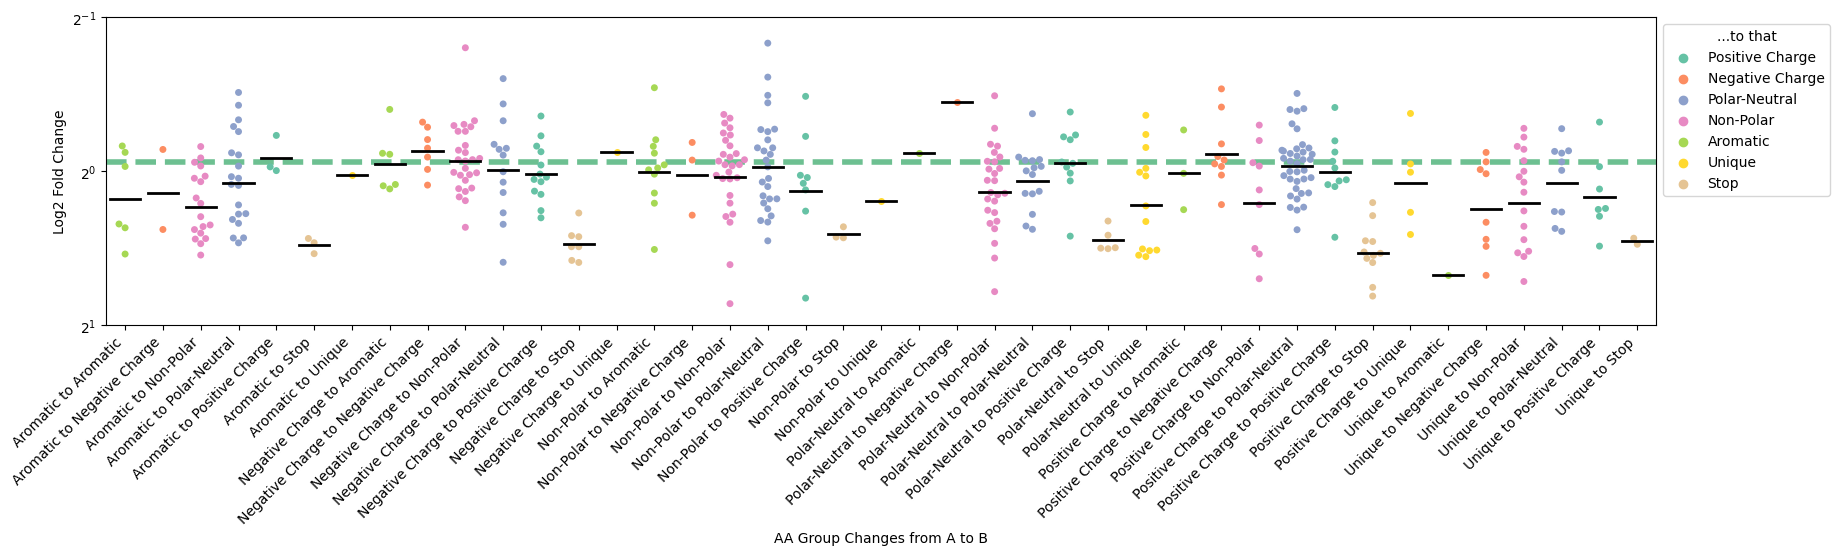

In [30]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,4)

g = sns.swarmplot(
    x='aa_full_change',
    y='value', 
    hue='aa_nonsynonymous', 
    data=df4,
    #palette = color_dict,
    order=alph_order,
    palette='Set2',
    hue_order=aa_categories
    
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="aa_full_change",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=alph_order,
    ax=g
)

plt.xticks(rotation=45, ha="right")

g.legend(title='...to that',bbox_to_anchor=(1.0, 1.0), loc='upper left')

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('AA Group Changes from A to B')

(2, 0.5)

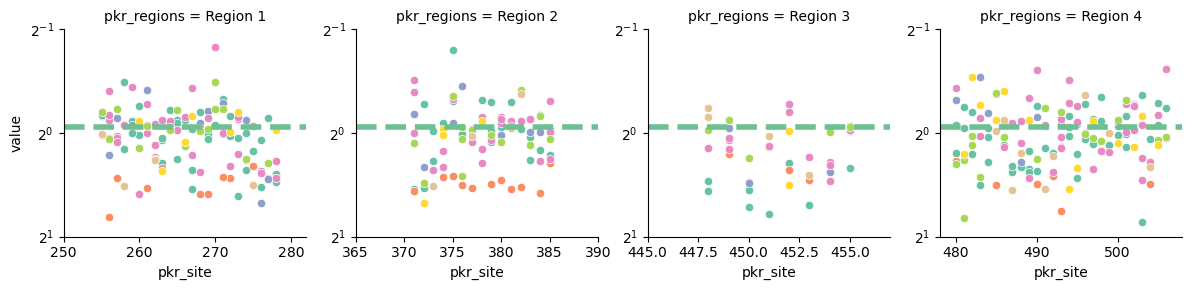

In [31]:
df4['pkr_site'] = df4['pkr'].str.split('-').str[1].str[1:-1].astype(int)

g = sns.FacetGrid(
    df4, 
    col='pkr_regions', 
    col_order=['Region 1','Region 2','Region 3', 'Region 4'],
    sharex=False,
    sharey=False,
    hue='aa_nonsynonymous',
    palette='Set2'
)



g.map(sns.scatterplot, 'pkr_site','value')
axes = g.axes



axes[0,0].set_xlim(250,282)
axes[0,0].invert_yaxis()
axes[0,0].axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
axes[0,0].set_yscale("log", base=2)
axes[0,0].set_ylim(bottom=2, top=.5)

axes[0,1].set_xlim(365,390)
axes[0,1].invert_yaxis()
axes[0,1].axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
axes[0,1].set_yscale("log", base=2)
axes[0,1].set_ylim(bottom=2, top=.5)

axes[0,2].set_xlim(445,457)
axes[0,2].invert_yaxis()
axes[0,2].axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
axes[0,2].set_yscale("log", base=2)
axes[0,2].set_ylim(bottom=2, top=.5)

axes[0,3].set_xlim(478,508)
axes[0,3].invert_yaxis()
axes[0,3].axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
axes[0,3].set_yscale("log", base=2)
axes[0,3].set_ylim(bottom=2, top=.5)


Text(0.5, 0, 'PKR Variant Site')

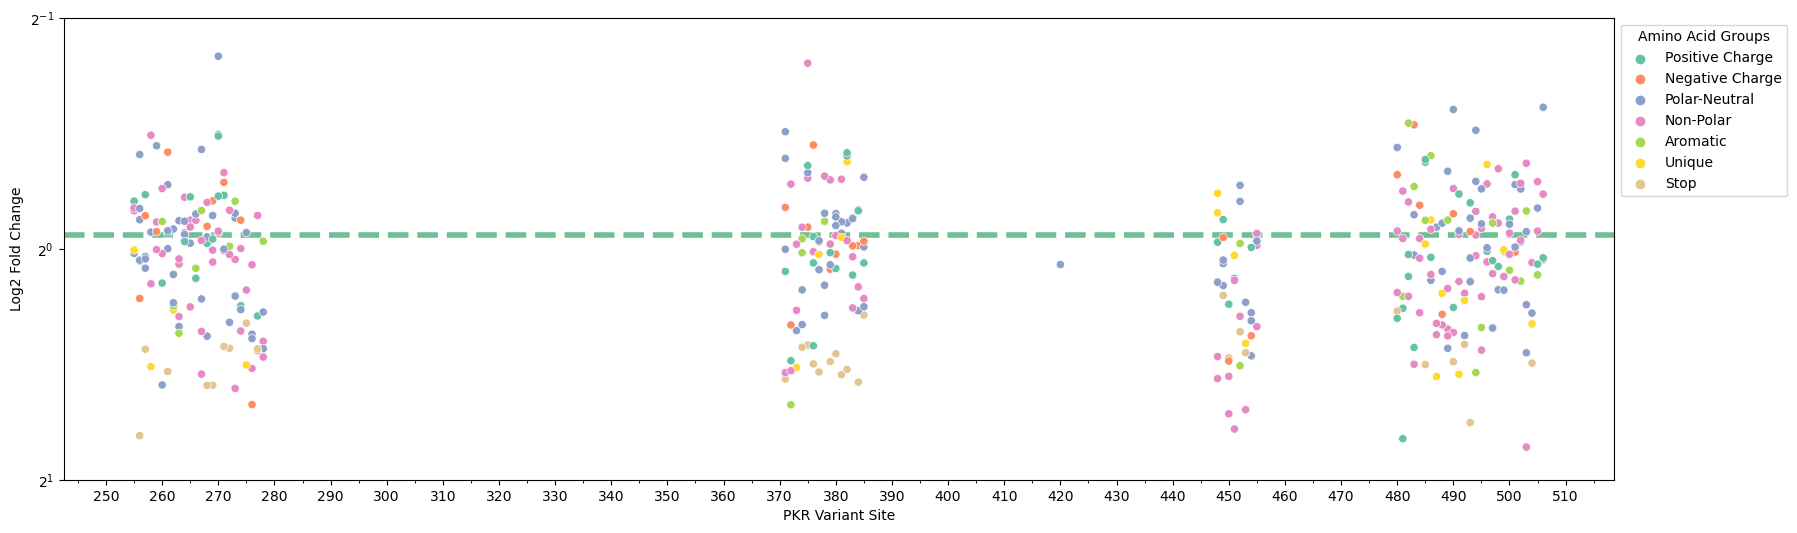

In [32]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,6)

g = sns.scatterplot(
    data=df4, 
    x='pkr_site',
    y='value',
    hue='aa_nonsynonymous',
    hue_order=aa_categories,
    palette='Set2',
    zorder=2
)

g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4, zorder=1) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)
g.xaxis.set_minor_locator(MultipleLocator(5))
g.xaxis.set_major_locator(MultipleLocator(10))

g.legend(title='Amino Acid Groups',bbox_to_anchor=(1.0, 1.0), loc='upper left')

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('PKR Variant Site')

In [33]:
df4.head()

,pkr,pkr_type,pkr_regions,variable,value,aa_same_type,aa_wt,WT AA,Nonsynonymous AA,aa_nonsynonymous,aa_full_change,pkr_site
0,PKR-F278L,Missense Variant,Region 1,mean_fold_change,1.320132,False,Aromatic,F,L,Non-Polar,Aromatic to Non-Polar,278
1,PKR-M455I,Missense Variant,Region 3,mean_fold_change,0.989696,False,Polar-Neutral,M,I,Non-Polar,Polar-Neutral to Non-Polar,455
2,PKR-Y454*,Nonsense,Region 3,mean_fold_change,1.378280,False,Aromatic,Y,*,Stop,Aromatic to Stop,454
3,PKR-E384D,Missense Variant,Region 2,mean_fold_change,0.990818,True,Negative Charge,E,D,Negative Charge,Negative Charge to Negative Charge,384
4,PKR-M455L,Missense Variant,Region 3,mean_fold_change,1.263435,False,Polar-Neutral,M,L,Non-Polar,Polar-Neutral to Non-Polar,455


Text(0.5, 0, 'PKR Variant Site')

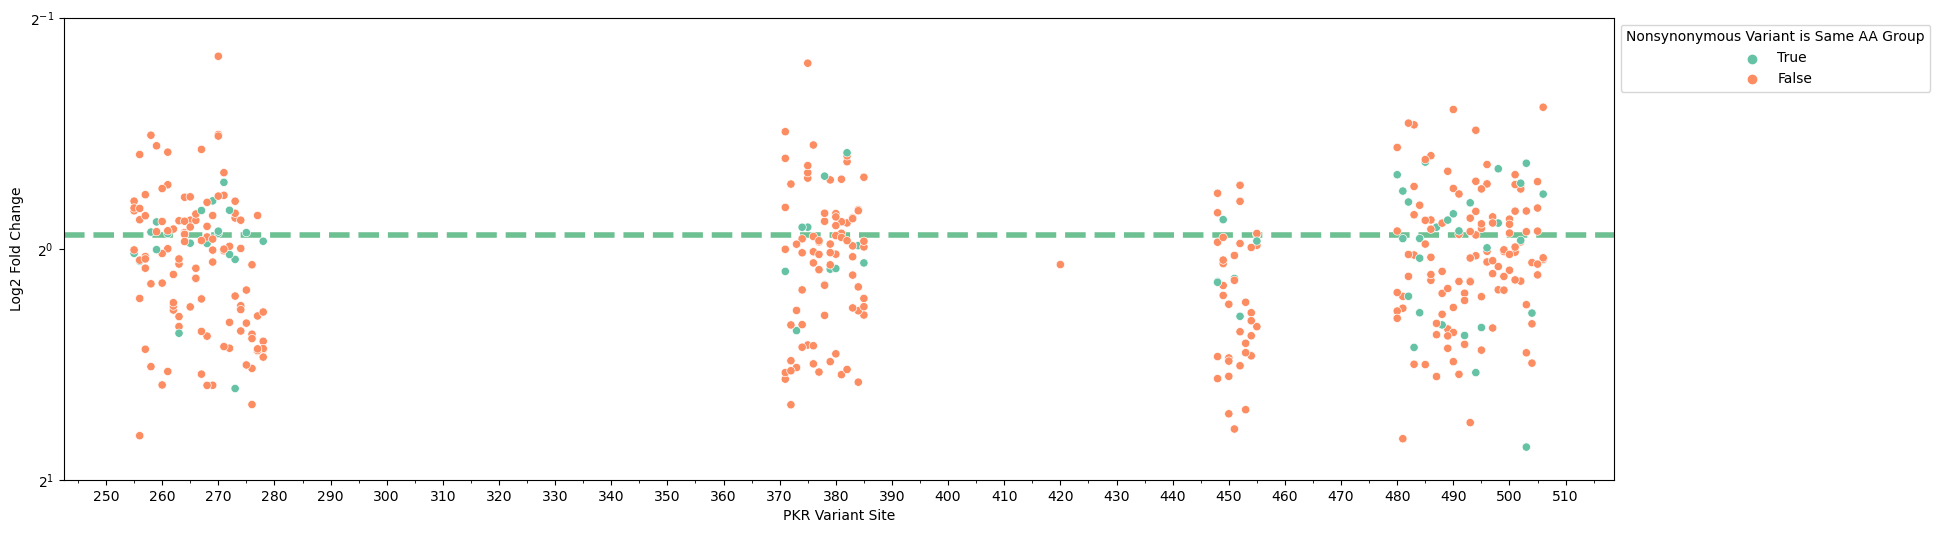

In [34]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,6)

g = sns.scatterplot(
    data=df4, 
    x='pkr_site',
    y='value',
    hue='aa_same_type',
    hue_order=[True,False],
    palette='Set2',
    zorder=2
)

g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4, zorder=1) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)
g.xaxis.set_minor_locator(MultipleLocator(5))
g.xaxis.set_major_locator(MultipleLocator(10))

g.legend(title='Nonsynonymous Variant is Same AA Group',bbox_to_anchor=(1.0, 1.0), loc='upper left')

g.set_ylabel('Log2 Fold Change')
g.set_xlabel('PKR Variant Site')

In [35]:
df4[df4['Selection Pressure'].notna()]

KeyError: 'Selection Pressure'

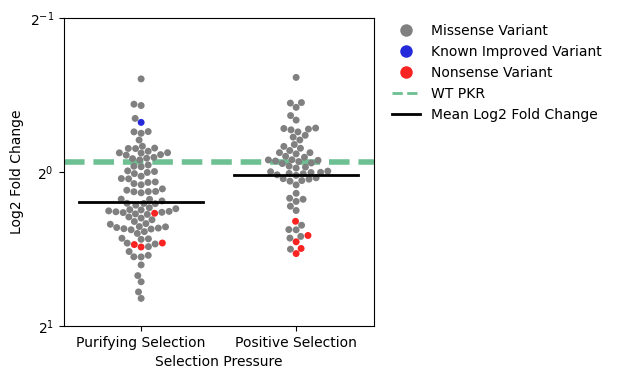

In [48]:
# positive selection
dar_red = [262,263,266,450,480,487,490,495,498,499] # highly conserved
dar_blue = [267,273,274,273,274,276,278,451,454,481] # well conserved
dar_neg = dar_red + dar_blue
elde_pos=[6,7,24,44,49,86,122,123,125,139,185,206,224,242,255,259,261,265,275,322,330,336,338,344,351,376,380,462,489,492,496,502,506,516,538]
full_sele = [dar_neg, elde_pos]

sele_map = {residue:selection for temp_list,selection in zip(full_sele,['Purifying Selection', 'Positive Selection']) for residue in temp_list }
df4['Selection Pressure'] = df4['pkr_site'].map(sele_map)

plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (4,4)

g = sns.swarmplot(
    x='Selection Pressure',
    y='value', 
    #color='gray',
    palette = color_dict,
    hue='pkr_type',
    data=df4[df4['Selection Pressure'].notna()],
    order=['Purifying Selection','Positive Selection']
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

# plot the mean line
sns.boxplot(
    showmeans=True,
    meanline=True,
    meanprops={'color': 'k', 'ls': '-', 'lw': 2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    zorder=10,
    x="Selection Pressure",
    y="value",
    data=df4,
    showfliers=False,
    showbox=False,
    showcaps=False,
    order=['Purifying Selection','Positive Selection'],
    ax=g
)

g.set_ylabel('Log2 Fold Change')
#g.set_xlabel('Selection Pressure')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Missense Variant', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Known Improved Variant', markerfacecolor='#242AD9', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nonsense Variant', markerfacecolor='#F92321', markersize=10),
    Line2D([0], [0], color='#6dc091', lw=2, label='WT PKR', linestyle='--'),
    Line2D([0], [0], color='black', lw=2, label='Mean Log2 Fold Change', linestyle='-'),

]

g.legend(handles=legend_elements,bbox_to_anchor=(1.02, 1.02), loc='upper left', frameon=False)._legend_box.align = "left" # title='PKR Variant Types', 

In [39]:
df4.head()

,pkr,pkr_type,pkr_regions,variable,value,aa_same_type,aa_wt,WT AA,Nonsynonymous AA,aa_nonsynonymous,aa_full_change,pkr_site,Selection Pressure
0,PKR-F278L,Missense Variant,Region 1,mean_fold_change,1.320132,False,Aromatic,F,L,Non-Polar,Aromatic to Non-Polar,278,Purifying Selection
1,PKR-M455I,Missense Variant,Region 3,mean_fold_change,0.989696,False,Polar-Neutral,M,I,Non-Polar,Polar-Neutral to Non-Polar,455,NaN
2,PKR-Y454*,Nonsense,Region 3,mean_fold_change,1.378280,False,Aromatic,Y,*,Stop,Aromatic to Stop,454,Purifying Selection
3,PKR-E384D,Missense Variant,Region 2,mean_fold_change,0.990818,True,Negative Charge,E,D,Negative Charge,Negative Charge to Negative Charge,384,NaN
4,PKR-M455L,Missense Variant,Region 3,mean_fold_change,1.263435,False,Polar-Neutral,M,L,Non-Polar,Polar-Neutral to Non-Polar,455,NaN


In [49]:
group1 = df4[df4['Selection Pressure'] == "Purifying Selection"]
group2 = df4[df4['Selection Pressure'] == "Positive Selection"]
ttest_ind(group1['value'],group2['value'])

Ttest_indResult(statistic=3.8659309938320434, pvalue=0.00016167057216510787)

In [45]:
df4

,pkr,pkr_type,pkr_regions,variable,value,aa_same_type,aa_wt,WT AA,Nonsynonymous AA,aa_nonsynonymous,aa_full_change,pkr_site,Selection Pressure
0,PKR-F278L,Missense Variant,Region 1,mean_fold_change,1.320132,False,Aromatic,F,L,Non-Polar,Aromatic to Non-Polar,278,Purifying Selection
1,PKR-M455I,Missense Variant,Region 3,mean_fold_change,0.989696,False,Polar-Neutral,M,I,Non-Polar,Polar-Neutral to Non-Polar,455,NaN
2,PKR-Y454*,Nonsense,Region 3,mean_fold_change,1.378280,False,Aromatic,Y,*,Stop,Aromatic to Stop,454,Purifying Selection
3,PKR-E384D,Missense Variant,Region 2,mean_fold_change,0.990818,True,Negative Charge,E,D,Negative Charge,Negative Charge to Negative Charge,384,NaN
4,PKR-M455L,Missense Variant,Region 3,mean_fold_change,1.263435,False,Polar-Neutral,M,L,Non-Polar,Polar-Neutral to Non-Polar,455,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,PKR-S448A,Missense Variant,Region 3,mean_fold_change,1.382137,False,Polar-Neutral,S,A,Non-Polar,Polar-Neutral to Non-Polar,448,NaN
401,PKR-I420T,Missense Variant,NaN,mean_fold_change,1.048707,False,Non-Polar,I,T,Polar-Neutral,Non-Polar to Polar-Neutral,420,NaN
402,PKR-F267I,Missense Variant,Region 1,mean_fold_change,1.456898,False,Aromatic,F,I,Non-Polar,Aromatic to Non-Polar,267,Purifying Selection
403,PKR-I503L,Missense Variant,Region 4,mean_fold_change,1.813361,True,Non-Polar,I,L,Non-Polar,Non-Polar to Non-Polar,503,NaN


(2, 0.5)

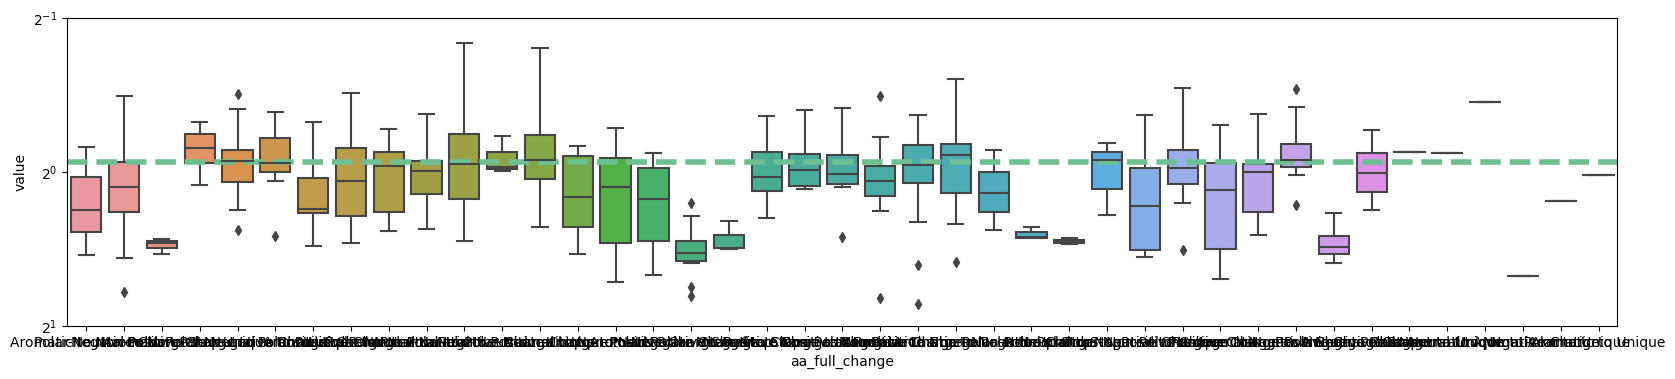

In [63]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = (20,4)

g = sns.boxplot(
    x='aa_full_change',
    y='value', 
    #hue='aa_full_change', 
    data=df4,
    #palette = color_dict,
    #order=['Resistant','STOP','Variant'],
    #hue_order=['Resistant','STOP','Variant']
)
g.axhline(0.958688, color='#6dc091', linestyle='--', linewidth=4) # pkr-wt , old1 0.928775, old2 0.966365
g.invert_yaxis()
g.set_yscale("log", base=2)
g.set_ylim(bottom=2, top=.5)

In [ ]:
# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="method",
            y="distance",
            data=planets,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)

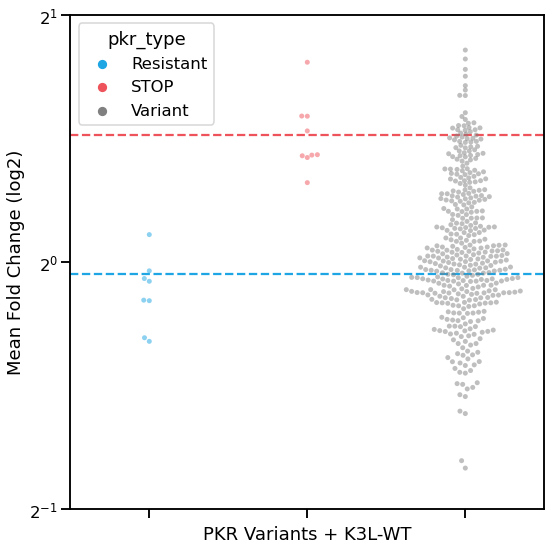

In [28]:
g.invert_yaxis()

g.axhline(0.966365, color='#1DA5E4', linestyle='--') # pkr-wt
g.axhline(1.428106, color='#EE535B', linestyle='--') # pkr-nulls



g.set_yscale("log", base=2)
g.set_ylim(bottom=.5, top=2)
g.set_ylabel('Mean Fold Change (log2)')
g.set_xlabel('PKR Variants + K3L-WT')
g.set_xticklabels('')
plt.tight_layout()
fig = g.get_figure()
#fig.savefig('../img/violinplot.png')

In [24]:
df2.pkr_type.value_counts()

Variant      388
STOP           9
Resistant      8
WT             1
Name: pkr_type, dtype: int64

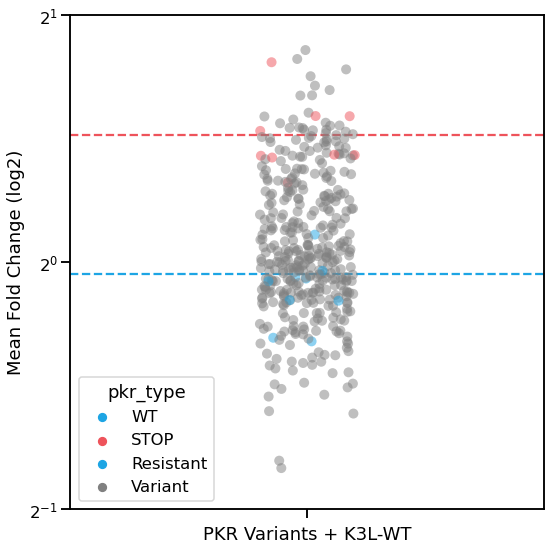

In [9]:
plt.rcParams["figure.figsize"] = (8,8)
sns.set_context("talk")

color_dict = {'WT':"#1DA5E4",'STOP':'#EE535B',"Resistant":"#1DA5E4","Variant":'gray'}
marker = {'WT':10,'STOP':5,"Resistant":5,"Variant":5}

g = sns.stripplot(
    x='variable',
    y='value', 
    hue='pkr_type', 
    data=df2, 
    alpha=.5,
    hue_order=['WT','STOP','Resistant','Variant'],
    #order=['WT','STOP','Resistant','Variant'],
    palette = color_dict,
    size=10
)
# PKR WT line
g.axhline(0.966365, color='#1DA5E4', linestyle='--') # pkr-wt
g.axhline(1.428106, color='#EE535B', linestyle='--') # pkr-nulls

g.set_yscale("log", base=2)
g.set_ylim(bottom=.5, top=2)
g.set_ylabel('Mean Fold Change (log2)')
g.set_xlabel('PKR Variants + K3L-WT')
g.set_xticklabels('')
plt.tight_layout()
fig = g.get_figure()
#fig.savefig('../img/stripplot.png')

In [172]:
df2.groupby('pkr_type')['value'].mean()

pkr_type
Resistant    0.920829
STOP         1.428106
Variant      1.061301
WT           0.958688
Name: value, dtype: float64

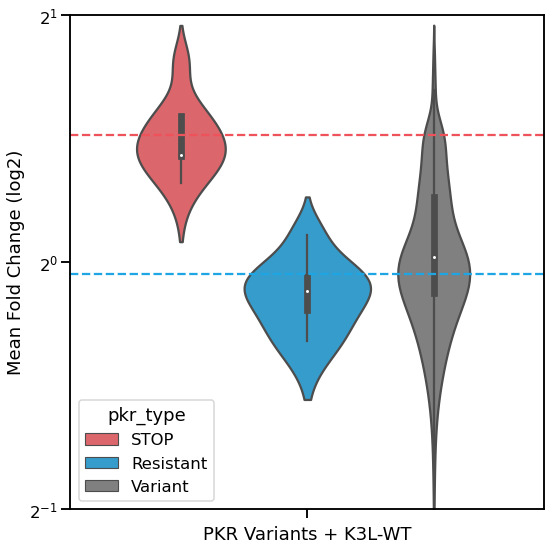

In [10]:
# violin
g = sns.violinplot(
    x='variable',
    y='value', 
    hue='pkr_type', 
    data=df2,
    palette = color_dict,
    hue_order=['STOP','Resistant','Variant']
)
g.axhline(0.966365, color='#1DA5E4', linestyle='--') # pkr-wt
g.axhline(1.428106, color='#EE535B', linestyle='--') # pkr-nulls

g.set_yscale("log", base=2)
g.set_ylim(bottom=.5, top=2)
g.set_ylabel('Mean Fold Change (log2)')
g.set_xlabel('PKR Variants + K3L-WT')
g.set_xticklabels('')
plt.tight_layout()
fig = g.get_figure()
#fig.savefig('../img/violinplot.png')

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_85617/3933723956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tp0_read_mean'] = df1[['1','2','3']].mean(axis=1)


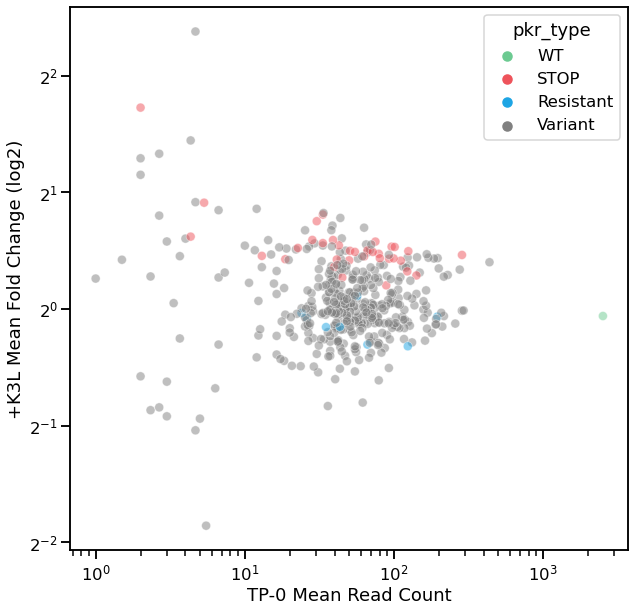

In [121]:
# maybe use a cutoff of 10 reads for the first timepoint
color_dict = {'WT':"#6CCA91",'STOP':'#EE535B',"Resistant":"#1DA5E4","Variant":'gray'}

g=sns.scatterplot(
    y='mean_fold_change',
    x='tp0_read_mean',
    data=df1,
    hue='pkr_type',
    alpha=.5,
    hue_order=['WT','STOP','Resistant','Variant'],
    palette=color_dict
)
g.set_yscale("log", base=2)
g.set_xscale("log", base=10)

g.set_ylabel('+K3L Mean Fold Change (log2)')
g.set_xlabel('TP-0 Mean Read Count')
fig = g.get_figure()
fig.savefig('../img/xy_reads-fc.png')

"g.set_ylabel('+Null Fold Change (log2)')\ng.set_xlabel('+K3L Fold Change (log2)')\nfig = g.get_figure()\nfig.savefig('../img/stripplot.png')"

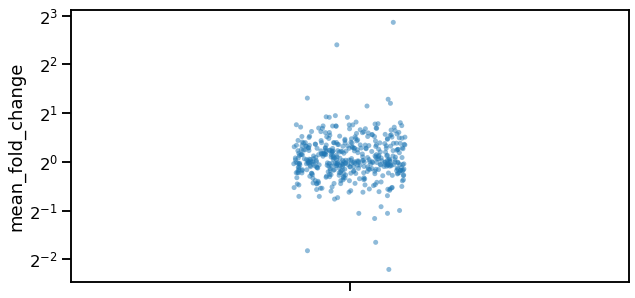

In [42]:
plt.rcParams["figure.figsize"] = (10,5)
sns.set_context("talk")

color_dict = {'WT':"#6CCA91",'STOP':'#EE535B',"Resistant":"#1DA5E4","Variant":'#FAAF4C'}

ax = sns.stripplot(
    y='mean_fold_change',
    hue='pkr_type',
    data=df1,
    alpha=.5
)
ax.set_yscale("log", base=2)

"""g.set_ylabel('+Null Fold Change (log2)')
g.set_xlabel('+K3L Fold Change (log2)')
fig = g.get_figure()
fig.savefig('../img/stripplot.png')"""

In [32]:
# now try to collect all other variants with WT and STOPS
# PKR
pkr_var = pd.read_csv('../data/pkr_agei-noti.codon_variant_table.csv')
pkr_dict = {}
pkr_dict['PKR-WT'] = pkr_var.query('n_aa_substitutions == 0').barcode.tolist()
pkr_stop = 350
pkr_dict['PKR-STOP'] = pkr_var.query('aa_substitutions.str[-1] == "*" and n_aa_substitutions == 1  ')[pkr_var.query('aa_substitutions.str[-1] == "*" and n_aa_substitutions == 1  ').aa_substitutions.str[1:-1].astype(int) < pkr_stop].barcode.tolist()

pkr_dict = {val:key for key, lst in pkr_dict.items() for val in lst}
pkr_vars = pkr_var.query('n_aa_substitutions == 1 and aa_substitutions.str[-1] != "*"') # all other variants
pkr_dict = pkr_dict | dict(zip(pkr_vars.barcode, pkr_vars.aa_substitutions))


# K3L 
k3l_var = pd.read_csv('../data/k3l_pvui-bamhi.codon_variant_table.csv')
k3l_var['barcode_rev_comp'] = k3l_var.barcode.apply(lambda x: ''.join(Seq(x).reverse_complement()))
k3l_dict = {}
k3l_dict['K3L-WT'] = k3l_var.query('n_aa_substitutions == 0').barcode_rev_comp.tolist()
k3l_stop = 40
k3l_dict['K3L-STOP'] = k3l_var.query('aa_substitutions.str[-1] == "*" and n_aa_substitutions == 1  ')[k3l_var.query('aa_substitutions.str[-1] == "*" and n_aa_substitutions == 1  ').aa_substitutions.str[1:-1].astype(int) < k3l_stop].barcode_rev_comp.tolist()
k3l_dict = {val:key for key, lst in k3l_dict.items() for val in lst}

k3l_vars = k3l_var.query('n_aa_substitutions == 1 and aa_substitutions.str[-1] != "*"') # all other variants
k3l_dict = k3l_dict | dict(zip(k3l_vars.barcode, k3l_vars.aa_substitutions))


# brief version to compile WT and STOP variants
sample_list = [1,2,3,4,5,6]
for sample in sample_list:
    df1 = pd.read_csv(f'../bartender/{sample}.pkr_barcode.txt', names=['pkr_barcode', 'line'])
    df2 = pd.read_csv(f'../bartender/{sample}.k3l_barcode.txt', names=['k3l_barcode', 'line'])

    # make a clus:var dict for pkr and k3l, wider net for identifying variants

    df3 = pd.merge(df1,df2,on='line', how='inner')
    df3['pkr'] = df3.pkr_barcode.map(pkr_dict)
    df3['k3l'] = df3.k3l_barcode.map(k3l_dict)
    df3 = df3.query('pkr.isnull() == False and k3l.isnull() == False') # dump nulls (half reads)
    df3['comb'] = df3.pkr.astype(str) + '_' + df3.k3l.astype(str)
    temp_df = df3.comb.value_counts().rename_axis('var').reset_index(name=sample)
    if sample == 1:
        df = temp_df
    else:
        df = pd.merge(df, temp_df, on='var',how='outer')
        

In [33]:
df['pkr'] = df['var'].str.split('_').str[0]
df['k3l'] = df['var'].str.split('_').str[1]

In [34]:
df2 = df.query('k3l == "K3L-WT"')

In [35]:
sample_list = [1,2,3,4,5,6]
# normalize read count
for sample in sample_list:
    df2[f'{sample}_norm'] = df2[sample]/df2[sample].sum()

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_85425/858053354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{sample}_norm'] = df2[sample]/df2[sample].sum()


In [36]:
# fold change
for t0,t1 in zip([1,2,3],[4,5,6]):
    df2[f'fold_change_{t0}'] = (df2[f'{t1}_norm'] - df2[f'{t0}_norm'])/df2[f'{t0}_norm']

/var/folders/fq/q1cflf795cgbnmbhdyn8d9nntyw5jt/T/ipykernel_85425/1082548071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'fold_change_{t0}'] = (df2[f'{t1}_norm'] - df2[f'{t0}_norm'])/df2[f'{t0}_norm']


In [37]:
df1 = df2.melt('var','fold_change_1','fold_change','value')

In [49]:
df1['pkr'] = df1['var'].str.split('_').str[0]
df1['k3l'] = df1['var'].str.split('_').str[1]

df1 = df1.query('k3l == "K3L-WT"')

def check_pkr(row, k3l_stop=40, pkr_stop=350):
    pkr_var = row['pkr']
    if pkr_var == 'PKR-WT':
        return 'PKR-WT'
    elif pkr_var == 'PKR-STOP':
        return 'PKR-STOP' 
    else:
        return 'PKR-VAR'
    

In [50]:
df1

,var,fold_change,value,pkr,k3l
0,PKR-WT_K3L-WT,fold_change_1,-0.073675,PKR-WT,K3L-WT
1,PKR-STOP_K3L-WT,fold_change_1,0.361399,PKR-STOP,K3L-WT
2,F278L_K3L-WT,fold_change_1,0.100265,F278L,K3L-WT
3,M455I_K3L-WT,fold_change_1,-0.121961,M455I,K3L-WT
4,E384D_K3L-WT,fold_change_1,0.026253,E384D,K3L-WT
...,...,...,...,...,...
400,I502C_K3L-WT,fold_change_1,0.315438,I502C,K3L-WT
401,R447M_K3L-WT,fold_change_1,0.315438,R447M,K3L-WT
402,H286R_K3L-WT,fold_change_1,1.630876,H286R,K3L-WT
403,D370Y_K3L-WT,fold_change_1,NaN,D370Y,K3L-WT


In [52]:
df1['pkr_type'] = df1.apply(lambda x: check_pkr(x), axis=1)

In [54]:
df1

,var,fold_change,value,pkr,k3l,pkr_type
0,PKR-WT_K3L-WT,fold_change_1,-0.073675,PKR-WT,K3L-WT,PKR-WT
1,PKR-STOP_K3L-WT,fold_change_1,0.361399,PKR-STOP,K3L-WT,PKR-STOP
2,F278L_K3L-WT,fold_change_1,0.100265,F278L,K3L-WT,PKR-VAR
3,M455I_K3L-WT,fold_change_1,-0.121961,M455I,K3L-WT,PKR-VAR
4,E384D_K3L-WT,fold_change_1,0.026253,E384D,K3L-WT,PKR-VAR
...,...,...,...,...,...,...
400,I502C_K3L-WT,fold_change_1,0.315438,I502C,K3L-WT,PKR-VAR
401,R447M_K3L-WT,fold_change_1,0.315438,R447M,K3L-WT,PKR-VAR
402,H286R_K3L-WT,fold_change_1,1.630876,H286R,K3L-WT,PKR-VAR
403,D370Y_K3L-WT,fold_change_1,NaN,D370Y,K3L-WT,PKR-VAR


<AxesSubplot:xlabel='fold_change', ylabel='value'>

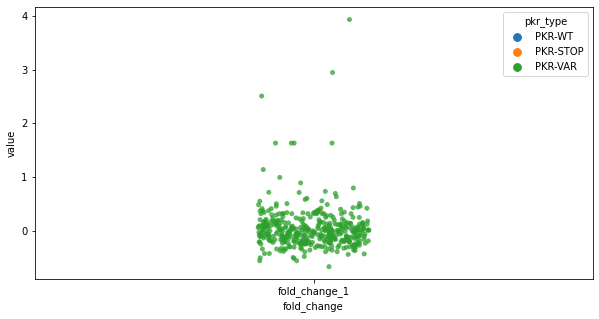

In [71]:
# log2 transform fold change
df1['log2_value'] = df1['value'].apply(lambda x: log2_transform(x))

sns.stripplot(data=df1, x='fold_change',y='value', hue='pkr_type',alpha=.75)



In [72]:
df2

,var,1,2,3,4,5,6,pkr,k3l,1_norm,2_norm,3_norm,4_norm,5_norm,6_norm,fold_change_1,fold_change_2,fold_change_3
0,PKR-WT_K3L-WT,3242.0,1863.0,2433.0,2283.0,2877.0,2144.0,PKR-WT,K3L-WT,0.087106,0.085341,0.092848,0.080688,0.081573,0.084423,-0.073675,-0.044155,-0.090747
1,PKR-STOP_K3L-WT,830.0,515.0,602.0,859.0,1069.0,791.0,PKR-STOP,K3L-WT,0.022300,0.023591,0.022974,0.030360,0.030310,0.031147,0.361399,0.284787,0.355758
2,F278L_K3L-WT,593.0,305.0,411.0,496.0,737.0,495.0,F278L,K3L-WT,0.015933,0.013972,0.015685,0.017530,0.020897,0.019491,0.100265,0.495644,0.242698
3,M455I_K3L-WT,406.0,210.0,239.0,271.0,324.0,243.0,M455I,K3L-WT,0.010908,0.009620,0.009121,0.009578,0.009187,0.009568,-0.121961,-0.045038,0.049085
4,E384D_K3L-WT,373.0,226.0,279.0,291.0,372.0,227.0,E384D,K3L-WT,0.010022,0.010353,0.010647,0.010285,0.010548,0.008938,0.026253,0.018814,-0.160494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,I502C_K3L-WT,1.0,NaN,2.0,1.0,2.0,NaN,I502C,K3L-WT,0.000027,NaN,0.000076,0.000035,0.000057,NaN,0.315438,NaN,NaN
763,R447M_K3L-WT,1.0,NaN,1.0,1.0,1.0,1.0,R447M,K3L-WT,0.000027,NaN,0.000038,0.000035,0.000028,0.000039,0.315438,NaN,0.031816
765,H286R_K3L-WT,1.0,NaN,3.0,2.0,3.0,5.0,H286R,K3L-WT,0.000027,NaN,0.000114,0.000071,0.000085,0.000197,1.630876,NaN,0.719693
778,D370Y_K3L-WT,NaN,3.0,NaN,NaN,3.0,1.0,D370Y,K3L-WT,NaN,0.000137,NaN,NaN,0.000085,0.000039,NaN,-0.381043,NaN
